In [11]:
# JSSP library
#   includes: JSSP reader, heuristic skeletons etc
%run JSSP_skeleton.ipynb

#Includes solver for runing JSSP
%run Solver.ipynb

# Heuristics
%run heuristics.ipynb

# JSS Problem Generator
%run problemGen.ipynb

# File reader
%run fileReader.ipynb

# Normal Tests (beggining ML techniques)
%run firstTests.ipynb

#For saving data
%run dataSaving.ipynb


In [2]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [2]:
import queue

def orderedSteps(machines):
    next_activities = queue.PriorityQueue()
    steps = []
    #El usuario no deberia de poder mover actividades despues de las que van despues deesta, por lo que checar prioridad de actividad no sera necesario
    #also los que no estan en maquina ni se veran
    for i in range(len(machines)):
        #debe de tener numero de paso y todos los datos que necesita un step
        if len(machines[i].machine)>0:
            next_activities.put((machines[i].machine[0].last_step, i, 0))
        
    while not next_activities.empty():
        #hacer un step con la actividad que sigue
        temp = next_activities.get()
        tempAct = machines[temp[1]].machine[temp[2]]
        #se supone que lo hacemospara que position siempre sea -1
        steps.append({"machine": machines[temp[1]].id, "activity": [tempAct.activities.id, tempAct.id], "position": -1})
        if len(machines[temp[1]].machine) > temp[2]+1:
            next_activities.put((machines[temp[1]].machine[temp[2]+1].last_step, temp[1], temp[2]+1))
    return steps

In [3]:
def apply_analysis(data_group):
    
    dataActs = {}
    dataMachines = {}
    datapreMachines = {}
    dataStates = {}
    
    idd = 0
    for i in data_group:
        #print("doing game", i)
        currJss = JSSProblem(idd, i[0], file_solver(idd, i[1], i[0]["act_info"]) , dataActs,dataMachines,dataStates, datapreMachines)
        #print("finished", idd)
        
    #print(len(dataActs['target']))
    
    #print(len(dataStates['target']))
    

    trees =[]
    # pre
    trees.append(finalTests(dataActs))
    #post
    trees.append(finalTests(dataMachines))
    #post
    trees.append(finalTests(dataStates))
    #pre
    trees.append(finalTests(datapreMachines))    

    return trees
    

In [4]:
data_dirs = ['dataPlayers/new_data', 'dataPlayers/DatosThesis']
for i in range(10):
    data_dirs.append("dataPlayers/public_game_data"+str(i))
games = readFromDir(data_dirs)
print(len(games))

reading dataPlayers/new_data
0 101_61_655_100.csv
1 103_61_656_100.csv
2 105_61_657_82.csv
3 107_61_658_100.csv
4 109_61_659_83.csv
5 111_61_660_87.csv
6 128_61_665_90.csv
7 137_61_661_93.csv
8 141_61_662_100.csv
9 145_61_663_76.csv
10 149_61_664_100.csv
11 167_61_667_94.csv
12 171_61_668_85.csv
13 175_61_669_100.csv
14 91_61_650_100.csv
15 93_61_651_100.csv
16 95_61_652_100.csv
17 97_61_653_100.csv
18 99_61_654_84.csv
reading dataPlayers/DatosThesis
0 103_63_675_100.csv
1 107_63_676_100.csv
2 111_63_677_95.csv
3 115_63_678_100.csv
4 119_63_679_91.csv
5 128_63_684_100.csv
6 128_63_685_100.csv
7 141_63_681_100.csv
8 145_63_682_100.csv
9 149_63_683_100.csv
10 171_63_686_100.csv
11 175_63_687_96.csv
12 179_63_688_90.csv
13 91_63_672_100.csv
14 91_63_680_100.csv
15 95_63_673_100.csv
16 99_63_674_56.csv
reading dataPlayers/public_game_data0
0 10_3_116_100.csv
1 11_2_97_100.csv
2 13_14_159_53.csv
3 13_2_98_100.csv
4 13_3_117_100.csv
5 15_2_99_100.csv
6 16_3_118_88.csv
7 17_14_160_40.csv
8 19

In [5]:
header_row = ["Heuristic", "Tree with gini and max_depth 4", "Tree with gini max_depth 4 and impurity decrease","Tree with entropy and max_depth 4", "Tree with entropy max_depth 4 and impurity decrease", "Tree with gini and max_depth 3", "Tree with gini max_depth 3 and impurity decrease","Tree with entropy and max_depth 3", "Tree with entropy max_depth 3 and impurity decrease"]
header_row.append("Small NN with lbfgs")
header_row.append("Medium NN with lbfgs")
header_row.append("Mixed NN with lbfgs")
header_row.append("Big NN with lbfgs")
header_row.append("Small NN with adam")
header_row.append("Medium NN with adam")
header_row.append("Mixed NN with adam")
header_row.append("Big NN with adam")
header_row.append("K-Neighbors (2 groups)")
header_row.append("K-Neighbors (3 groups)")
header_row.append("K-Neighbors (5 groups)")
header_row.append("K-Neighbors (8 groups)")
header_row.append("Linear Division SVC")
header_row.append("Polynomial  Division SVC")
header_row.append("RBF Division SVC")
header_row.append("Random Forest with gini (3 trees)")
header_row.append("Random Forest with gini (5 trees)")
header_row.append("Random Forest with gini (10 trees)")
header_row.append("Random Forest with entropy (3 trees)")
header_row.append("Random Forest with entropy (5 trees)")
header_row.append("Random Forest with entropy (10 trees)")

In [ ]:
problems = [[4,4, 1166510396,164000672], [15,15, 840612802,398197754], [15,15, 1314640371,386720536], [15,15, 1227221349,316176388],
                [20, 15, 533484900, 317419073], [20, 15, 1894307698, 1474268163], [20, 15, 874340513, 509669280],
                [10, 10, 1344106948, 1868311537], [10, 10, 425990073, 1111853152], [10, 10, 666128954, 1750328066],
                [15,15, 342269428,1806358582], [15,15, 1603221416,1501949241], [15,15, 1357584978,1734077082],
                [20, 15, 1124986343, 1209573668], [20, 15, 1463788335, 529048107], [20, 15, 1056908795, 25321885],
                [10, 10, 442723456, 1369177184], [10, 10, 2033800800, 1344077538], [10, 10, 964467313, 1735817385]]

In [30]:
problems = [[4,4, 1166510396,164000672], [4,4, 840612802,398197754], [4,4, 1314640371,386720536], [4,4, 1227221349,316176388],
                [5, 4, 533484900, 317419073], [5, 4, 1894307698, 1474268163], [5, 4, 874340513, 509669280],
                [3, 3, 1344106948, 1868311537], [3, 3, 425990073, 1111853152], [3, 3, 666128954, 1750328066], 
                [4,4, 342269428,1806358582], [4,4, 1603221416,1501949241], [4,4, 1357584978,1734077082],
                [5, 4, 1124986343, 1209573668], [5, 4, 1463788335, 529048107], [5, 4, 1056908795, 25321885],
                [3, 3, 442723456, 1369177184], [3, 3, 2033800800, 1344077538], [3, 3, 964467313, 1735817385]]

s = comparison_solver(id, double_heuristic_solver(1, earliest_start_activity, least_occupied_machine), double_heuristic_solver(1, earliest_start_activity, least_occupied_machine))
for i in problems:
    JSSProblem(1, pg.generate_problem(i[0],i[1], i[2],i[3]), s)
print(s.get_accuracy())

s = comparison_solver(id, double_heuristic_solver(1, shortest_activity, least_occupied_machine), double_heuristic_solver(1, earliest_start_activity, least_occupied_machine))
for i in problems:
    JSSProblem(1, pg.generate_problem(i[0],i[1], i[2],i[3]), s)
print(s.get_accuracy())

(1.0, 1.0)
(0.3111888111888112, 0.3111888111888112)


In [ ]:
problems = [[4,4, 1166510396,164000672], [4,4, 840612802,398197754], [4,4, 1314640371,386720536], [4,4, 1227221349,316176388],
                [5, 4, 533484900, 317419073], [5, 4, 1894307698, 1474268163], [5, 4, 874340513, 509669280],
                [3, 3, 1344106948, 1868311537], [3, 3, 425990073, 1111853152], [3, 3, 666128954, 1750328066], 
                [4,4, 342269428,1806358582], [4,4, 1603221416,1501949241], [4,4, 1357584978,1734077082],
                [5, 4, 1124986343, 1209573668], [5, 4, 1463788335, 529048107], [5, 4, 1056908795, 25321885],
                [3, 3, 442723456, 1369177184], [3, 3, 2033800800, 1344077538], [3, 3, 964467313, 1735817385]]


In [7]:
#Como se analizan los ML con heuristica
#si recolectas datos de cada una de las heuristicas y luego las pasas por el analizador ya tienes las accuracies que necesitas

heuristics = [("Earliest Start",double_heuristic_solver(1, earliest_start_activity, least_occupied_machine)),("Shortest Activity",double_heuristic_solver(1, shortest_activity, least_occupied_machine)), ("Longest Activity", double_heuristic_solver(1, longest_activity, least_occupied_machine)), ("Longest Job Remaining Time",double_heuristic_solver(1, longest_job, least_occupied_machine)),("Most Loaded Machine",double_heuristic_solver(1, most_loaded, least_occupied_machine)),("Least Loaded Machine",double_heuristic_solver(1, least_loaded, least_occupied_machine)),("Hyper-Heuristic",double_heuristic_solver(1, hyper_heuristic, least_occupied_machine)),("Simple Hyper-Heuristic 1",double_heuristic_solver(1, simple_hyper_heuristic1, least_occupied_machine)),("Simple Hyper-Heuristic 2",double_heuristic_solver(1, simple_hyper_heuristic2, least_occupied_machine)),("Simple Hyper-Heuristic 3",double_heuristic_solver(1, simple_hyper_heuristic3, least_occupied_machine))]

name="Heuristics_pre.csv"
addRowToFile(name, header_row)
name="Heuristics_pre_std.csv"
addRowToFile(name, header_row)
name="Heuristics_pre_acc.csv"
addRowToFile(name, header_row)

name="Heuristics_post.csv"
addRowToFile(name, header_row)
name="Heuristics_post_std.csv"
addRowToFile(name, header_row)
name="Heuristics_post_acc.csv"
addRowToFile(name, header_row)



pg = problemGenerator();
preT = 0
preF = 0
for h in heuristics:
    print(h[0])
    data_pre = {}
    data_post = {}
    for i in problems:
        JSSProblem(1, pg.generate_problem(i[0],i[1], i[2],i[3]), h[1], data_acts= data_pre, data_state = data_post)
   
    for jj in data_pre["target"]:
        preT +=1
        if not jj:
            preF += 1
    print("PreState")
    tt = doAll(data_pre)
    
    row = [h[0]]
    row2 = [h[0]]
    row3 = [h[0]]
    
    for i in tt:
        row.append(tt[i][0])
        row2.append(tt[i][2])
        
        clf = tt[i][1]
        
        s = comparison_solver(id, h[1], ML_solver(id, lambda x: clf.predict([x]), pre_act= True))
        for i in problems:
            JSSProblem(1, pg.generate_problem(i[0],i[1], i[2],i[3]), s)
        acc = s.get_accuracy()
        print(acc)
        row3.append(acc[0])
        
    name="Heuristics_pre.csv"
    addRowToFile(name, row)
    name="Heuristics_pre_std.csv"
    addRowToFile(name, row2)
    name="Heuristics_pre_acc.csv"
    addRowToFile(name, row3)

    #print(tt)
    print("PostState")
    tt = doAll(data_post)
    
    row = [h[0]]
    row2 = [h[0]]
    row3 = [h[0]]
    
    for i in tt:
        row.append(tt[i][0])
        row2.append(tt[i][2])
        
        clf = tt[i][1]
        s = comparison_solver(id, h[1], ML_solver(id, lambda x: clf.predict([x]), pre_act= False))
        for i in problems:
            JSSProblem(1, pg.generate_problem(i[0],i[1], i[2],i[3]), s)
        acc = s.get_accuracy()
        print(acc)
        row3.append(acc[0])
    
    name="Heuristics_post.csv"
    addRowToFile(name, row)
    name="Heuristics_post_std.csv"
    addRowToFile(name, row2)
    name="Heuristics_post_acc.csv"
    addRowToFile(name, row3)
    
    #print(tt)
    

Earliest Start
PreState
tree with gini
Using a Decision Tree
0.9575809325809326 0.0071400123817383955
tree with gini and impurity decrease
Using a Decision Tree
0.8842961092961094 0.011084287738714704
tree with entropy
Using a Decision Tree
0.9305836055836056 0.010805370726117246
tree with entropy and impurity decrease
Using a Decision Tree
0.8842961092961094 0.011084287738714704
tree with gini with deth of 3
Using a Decision Tree
0.9566156816156816 0.0062424267887273175
tree with gini and impurity decrease with depth of 3
Using a Decision Tree
0.8842961092961094 0.011084287738714704
tree with entropy with depth of 3
Using a Decision Tree
0.9305836055836056 0.010805370726117246
tree with entropy and impurity decrease with depth of 3
Using a Decision Tree
0.8842961092961094 0.011084287738714704
small NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8938706563706564 0.09931211722998665
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.9556430056430056 0.003318803901469255
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.9266929016929017 0.033467389711226384
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.9469520344520345 0.01141839830197203
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.2757944757944758 0.008366135147388232
medium NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.891038016038016 0.015486926276262998
mixed NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9189820314820315 0.02636575781707485
big NN with adam
Using a Neural Network
0.8997104247104246 0.005462842933139381
KNeigh of 2
Using the K-neighbours algorithm
0.7358219483219482 0.028587359290145598
KNeigh of 3
Using the K-neighbours algorithm
0.7213320463320463 0.017836782716291407
KNeigh of 5
Using the K-neighbours algorithm
0.7415837540837541 0.014789445734396573
KNeigh of 8
Using the K-neighbours algorithm
0.7280813780813781 0.017033187127667486
linear division svc
using SVC
0.920931095931096 0.004208106172397815
poly division svc
using SVC
0.8611412236412236 0.018286915635679288
rbf division svc
using SVC
0.8862340362340363 0.01761040840015236
random forest with gini and 3 trees
using random forest
0.9373292248292249 0.009127024834416183
random forest with gini and 5 trees
using random forest
0.9363639738639739 0.0062966985179539435
random forest with gini and 10 trees
using random forest
0.9315488565488566 0.014706844365777485
random forest with entropy and 3 trees
using ran

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.9093814968814968 0.039714990288867
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.9508390258390258 0.01831706292084313
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.9421443421443422 0.003802531814262953
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.947950697950698 0.02079253983635701
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.2757944757944758 0.008366135147388232
medium NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8891038016038015 0.012907475279024852
mixed NN with adam
Using a Neural Network
0.9112822987822988 0.002734144935177779
big NN with adam
Using a Neural Network
0.9036011286011285 0.02265022459638558
KNeigh of 2
Using the K-neighbours algorithm
0.7492797742797742 0.007103784423061495
KNeigh of 3
Using the K-neighbours algorithm
0.7329002079002078 0.013389796100014941
KNeigh of 5
Using the K-neighbours algorithm
0.7357736857736857 0.015116315844585945
KNeigh of 8
Using the K-neighbours algorithm
0.746387733887734 0.021336681935296444
linear division svc
using SVC
0.9170886545886545 0.01659173815873411
poly division svc
using SVC
0.8592255717255718 0.011190155627247095
rbf division svc
using SVC
0.8833419958419958 0.01778201191337887
random forest with gini and 3 trees
using random forest
0.9171072171072172 0.023834213693950917
random forest with gini and 5 trees
using random forest
0.9267151767151767 0.007184629943515742
random forest with gini and 10 trees
using random forest
0.923823

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8875581239381203 0.1389849811488197
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9834290887954931 0.017898753532640612
mixed NN with lbfgs
Using a Neural Network
0.6619422337476526 0.009584950566207971
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.984653044800143 0.01073178985956243
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.3380577662523473 0.009584950566207982
medium NN with adam
Using a Neural Network
0.9598218277743003 0.010782671809899511
mixed NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9704518018420817 0.00841236675676343
big NN with adam
Using a Neural Network
0.9668972994724135 0.01204380799990554
KNeigh of 2
Using the K-neighbours algorithm
0.8132433157471162 0.005104101449931816
KNeigh of 3
Using the K-neighbours algorithm
0.8368505767683091 0.024652642113310592
KNeigh of 5
Using the K-neighbours algorithm
0.8368673432889208 0.022437184686974865
KNeigh of 8
Using the K-neighbours algorithm
0.8096999910578557 0.0377593112496562
linear division svc
using SVC
0.9834514441563087 0.00529638967492058
poly division svc
using SVC
0.9479902530626845 0.010553216216077502
rbf division svc
using SVC
0.9562840919252437 0.008340924128593784
random forest with gini and 3 trees
using random forest
0.9775328623803987 0.018452634015385754
random forest with gini and 5 trees
using random forest
0.9798801752660289 0.015867047074995075
random forest with gini and 10 trees
using random forest
0.9964566753107394 0.003912810849638044
random forest with entropy and 3 trees
using random

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.9869947688455691 0.010262941435407943
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9622362067423769 0.03698081929248256
mixed NN with lbfgs
Using a Neural Network
0.6619422337476526 0.009584950566207971
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9858322900831619 0.012026024482386303
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.3380577662523473 0.009584950566207982
medium NN with adam
Using a Neural Network
0.9610346060985424 0.022679962523167365
mixed NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.974000715371546 0.005259048147930845
big NN with adam
Using a Neural Network
0.9539311901994098 0.02340285644426172
KNeigh of 2
Using the K-neighbours algorithm
0.8026077528391309 0.021144474900457073
KNeigh of 3
Using the K-neighbours algorithm
0.8202964320844138 0.022209111507661965
KNeigh of 5
Using the K-neighbours algorithm
0.8132377269069122 0.01851225261936847
KNeigh of 8
Using the K-neighbours algorithm
0.7860703746758473 0.011406936494392918
linear division svc
using SVC
0.9834514441563087 0.00529638967492058
poly division svc
using SVC
0.9444413395332201 0.003966970429956892
rbf division svc
using SVC
0.9574577483680585 0.006615883869154059
random forest with gini and 3 trees
using random forest
0.9775775731020299 0.016117377962946884
random forest with gini and 5 trees
using random forest
0.9787232853438254 0.015888815174483914
random forest with gini and 10 trees
using random forest
0.9964566753107394 0.003912810849638044
random forest with entropy and 3 trees
using rando

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8543577981651376 0.11719151106257315
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9151376146788991 0.018491416853895767
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8887614678899083 0.05283947721792786
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.930045871559633 0.02136231193829949
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.32798165137614677 0.014686064764754243
medium NN with adam
Using a Neural Network
0.926605504587156 0.014864084170660218
mixed NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9472477064220184 0.0201260651086975
big NN with adam
Using a Neural Network
0.9380733944954128 0.020642201834862383
KNeigh of 2
Using the K-neighbours algorithm
0.7672018348623852 0.018168554492838156
KNeigh of 3
Using the K-neighbours algorithm
0.7958715596330276 0.011917780786024361
KNeigh of 5
Using the K-neighbours algorithm
0.7672018348623852 0.018168554492838156
KNeigh of 8
Using the K-neighbours algorithm
0.7408256880733946 0.013951290207106035
linear division svc
using SVC
0.9197247706422018 0.01986296797670731
poly division svc
using SVC
0.9208715596330275 0.00818971150062254
rbf division svc
using SVC
0.9426605504587157 0.011917780786024361
random forest with gini and 3 trees
using random forest
0.963302752293578 0.013373742878085548
random forest with gini and 5 trees
using random forest
0.9678899082568808 0.006487218176023372
random forest with gini and 10 trees
using random forest
0.9827981651376146 0.0067844951641050566
random forest with entropy and 3 trees
using rando

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.9300458715596331 0.02160716018511097
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.9392201834862385 0.018455822178246685
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.9277522935779817 0.020610321967444264
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.9415137614678899 0.02478231970753935
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.32798165137614677 0.014686064764754243
medium NN with adam
Using a Neural Network
0.9334862385321101 0.007606937592558261
mixed NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9438073394495413 0.01601403674744144
big NN with adam
Using a Neural Network
0.9288990825688073 0.01669749974605622
KNeigh of 2
Using the K-neighbours algorithm
0.8038990825688073 0.021114624586607754
KNeigh of 3
Using the K-neighbours algorithm
0.8038990825688073 0.016014036747441472
KNeigh of 5
Using the K-neighbours algorithm
0.7912844036697247 0.021637571403799582
KNeigh of 8
Using the K-neighbours algorithm
0.7763761467889908 0.016658072300841664
linear division svc
using SVC
0.9380733944954128 0.01761730676116655
poly division svc
using SVC
0.9254587155963303 0.012718505167900742
rbf division svc
using SVC
0.9438073394495412 0.009931483988353671
random forest with gini and 3 trees
using random forest
0.9644495412844037 0.0067844951641050566
random forest with gini and 5 trees
using random forest
0.930045871559633 0.019017343981395672
random forest with gini and 10 trees
using random forest
0.9667431192660552 0.017876671179036584
random forest with entropy and 3 trees
using rand

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8498923373923374 0.0691176966719825
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.897029997029997 0.011552858218128632
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.9143599643599644 0.011864627512795397
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8941379566379566 0.011622190176756394
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.27527101277101274 0.004673172205394735
medium NN with adam
Using a Neural Network
0.9095559845559846 0.01677340073469861
mixed NN with adam
Using a Neural Network
0.9028103653103654 0.02225654459583245
big NN with adam
Using a Neural Network
0.897980397980398 0.02217026400918513
KNeigh of 2
Using the K-neighbours algorithm
0.7324250074250075 0.01419016050699336
KNeigh of 3
Using the K-neighbours algorithm
0.7363082863082863 0.014382122467604955
KNeigh of 5
Using the K-neighbours algorithm
0.7334051084051084 0.02103428596054676
KNeigh of 8
Using the K-neighbours algorithm
0.7517040392040393 0.01947281596517857
linear division svc
using SVC
0.8912273537273538 0.008955860237241521
poly division svc
using SVC
0.8652658152658153 0.02269476323938062
rbf division svc
using SVC
0.9028140778140777 0.022413298414434984
random forest with gini and 3 trees
using random forest
0.9778400653400654 0.016467958014656222
random forest with gini and 5 trees
using random forest
0.9681912681912682 0.0288

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8432358182358182 0.08160157984086999
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.93745544995545 0.016358342469316327
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.9528400653400653 0.008322379283182399
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.9538053163053163 0.011199576472131422
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.27527101277101274 0.004673172205394735
medium NN with adam
Using a Neural Network
0.9278326403326403 0.01249832501603991
mixed NN with adam
Using a Neural Network
0.9384021384021384 0.017834178489049536
big NN with adam
Using a Neural Network
0.8729581229581229 0.015113518259008737
KNeigh of 2
Using the K-neighbours algorithm
0.755557618057618 0.01633770388224237
KNeigh of 3
Using the K-neighbours algorithm
0.7421035046035045 0.035089556595723055
KNeigh of 5
Using the K-neighbours algorithm
0.7555501930501931 0.03477467230627312
KNeigh of 8
Using the K-neighbours algorithm
0.7584236709236709 0.015195216923656347
linear division svc
using SVC
0.9172371547371547 0.017481736115939953
poly division svc
using SVC
0.8825883575883575 0.01888812290998349
rbf division svc
using SVC
0.9047223047223047 0.014189793356679662
random forest with gini and 3 trees
using random forest
0.9884466884466885 0.006670351615704871
random forest with gini and 5 trees
using random forest
0.9585981585981586 0.0

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8365384615384615 0.01231370045660164
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8269230769230769 0.009421114395319927
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8374999999999999 0.015233634151687363
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8423076923076922 0.014131671592979868
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.275 0.015504341823651062
medium NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8365384615384615 0.012900392177883403
mixed NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8432692307692308 0.007385717065258251
big NN with adam
Using a Neural Network
0.8317307692307692 0.02423000609298876
KNeigh of 2
Using the K-neighbours algorithm
0.8048076923076923 0.008760032287638745
KNeigh of 3
Using the K-neighbours algorithm
0.8096153846153846 0.015504341823651057
KNeigh of 5
Using the K-neighbours algorithm
0.8105769230769231 0.01571166792150787
KNeigh of 8
Using the K-neighbours algorithm
0.8076923076923077 0.011538461538461553
linear division svc
using SVC
0.8413461538461539 0.00787053151141579
poly division svc
using SVC
0.8673076923076923 0.01550434182365104
rbf division svc
using SVC
0.864423076923077 0.014487037666653223
random forest with gini and 3 trees
using random forest
0.8596153846153847 0.013733516208736245
random forest with gini and 5 trees
using random forest
0.8596153846153847 0.005769230769230795
random forest with gini and 10 trees
using random forest
0.8615384615384615 0.006661733875264937
random forest with entropy and 3 trees
using random

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.760576923076923 0.03233686869384661
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8307692307692307 0.02016940092634905
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8326923076923076 0.019134373790511902
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8394230769230768 0.014988901219346045
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.275 0.015504341823651062
medium NN with adam
Using a Neural Network
0.835576923076923 0.016402617412723048
mixed NN with adam
Using a Neural Network
0.8432692307692308 0.01257374695252113
big NN with adam
Using a Neural Network
0.835576923076923 0.014988901219346045
KNeigh of 2
Using the K-neighbours algorithm
0.7903846153846152 0.01932668388677095
KNeigh of 3
Using the K-neighbours algorithm
0.8038461538461539 0.024172702096108722
KNeigh of 5
Using the K-neighbours algorithm
0.8144230769230769 0.021131981707534532
KNeigh of 8
Using the K-neighbours algorithm
0.8086538461538462 0.029962377790159426
linear division svc
using SVC
0.8423076923076923 0.009421114395319927
poly division svc
using SVC
0.875 0.014518912375520669
rbf division svc
using SVC
0.8605769230769231 0.01547449705714526
random forest with gini and 3 trees
using random forest
0.8605769230769231 0.0068667581043681545
random forest with gini and 5 trees
using random forest
0.8615384615384616 0.00815892439830634
random fo

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8002277327935223 0.05479865310789361
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8395463301554134 0.0116756097651626
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8355099908580386 0.011678962514477337
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8395626550868487 0.009924043677082528
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.2885962191458796 0.006617855938268466
medium NN with adam
Using a Neural Network
0.8224214770797963 0.01762698173426181
mixed NN with adam
Using a Neural Network
0.8345223325062036 0.01227931403028383
big NN with adam
Using a Neural Network
0.8294575225284054 0.01630415034491613
KNeigh of 2
Using the K-neighbours algorithm
0.7184479887684472 0.010925089889999825
KNeigh of 3
Using the K-neighbours algorithm
0.7285572025597493 0.022147116114137406
KNeigh of 5
Using the K-neighbours algorithm
0.7315609899438422 0.03805468014422394
KNeigh of 8
Using the K-neighbours algorithm
0.7366135562230639 0.032188917191350315
linear division svc
using SVC
0.8395626550868487 0.008122095339684892
poly division svc
using SVC
0.8304778307431109 0.010218548907833318
rbf division svc
using SVC
0.8446029776674938 0.01288808103865801
random forest with gini and 3 trees
using random forest
0.8234213791302076 0.013043857733190715
random forest with gini and 5 trees
using random forest
0.8415991902834008 0.01

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.826441491445736 0.0026144493644711265
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8355303970223326 0.017797018327432516
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8294575225284054 0.009326047521979448
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8375261198902966 0.012051363038289282
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.2885962191458796 0.006617855938268466
medium NN with adam
Using a Neural Network
0.8244253624134779 0.012832398203791884
mixed NN with adam
Using a Neural Network
0.8183851377824214 0.014313129764582207
big NN with adam
Using a Neural Network
0.816352683818728 0.006529702186840337
KNeigh of 2
Using the K-neighbours algorithm
0.7336138500718297 0.029252526556441113
KNeigh of 3
Using the K-neighbours algorithm
0.7104120412694266 0.03470016727416358
KNeigh of 5
Using the K-neighbours algorithm
0.7296101606373253 0.03809634108174103
KNeigh of 8
Using the K-neighbours algorithm
0.7336097688389709 0.027423350928830987
linear division svc
using SVC
0.8304696682773933 0.01035334935026448
poly division svc
using SVC
0.8294697662269819 0.008637809549642146
rbf division svc
using SVC
0.8355099908580386 0.010192151648050384
random forest with gini and 3 trees
using random forest
0.8304737495102521 0.00029689391209800824
random forest with gini and 5 trees
using random forest
0.8375465260545906 0

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.7344165514306988 0.027838721343758997
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.7660754175087756 0.026208317515795724
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.6933526575187037 0.00840204632295253
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.7196885083147183 0.016732696882790835
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.3013730808779208 0.002464894563616152
medium NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7566039073857391 0.013440426599843765
mixed NN with adam
Using a Neural Network
0.7017826117788888 0.005902554076136025
big NN with adam
Using a Neural Network
0.7428908272169628 0.01951104861648369
KNeigh of 2
Using the K-neighbours algorithm
0.7260397830018083 0.01040983486387617
KNeigh of 3
Using the K-neighbours algorithm
0.6765282062191966 0.03132623484259643
KNeigh of 5
Using the K-neighbours algorithm
0.6839121724639223 0.020291737890985692
KNeigh of 8
Using the K-neighbours algorithm
0.7070746019926959 0.012467533418117845
linear division svc
using SVC
0.7144497039322057 0.015910819818588367
poly division svc
using SVC
0.7755735205474595 0.025707200373476662
rbf division svc
using SVC
0.7903059958160479 0.014101613562949847
random forest with gini and 3 trees
using random forest
0.7439146544693828 0.015132277086988997
random forest with gini and 5 trees
using random forest
0.7439190866219906 0.013513117975722272
random forest with gini and 10 trees
using random forest
0.74605

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.7323467361628195 0.03222516057306983
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7112496897493175 0.015208075798149532
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.7165461121157323 0.003256507351563333
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.3013730808779208 0.002464894563616152
medium NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.750257064851257 0.022267508749936306
mixed NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7154956919476652 0.009480368212047428
big NN with adam
Using a Neural Network
0.7534349182711058 0.017872542594966224
KNeigh of 2
Using the K-neighbours algorithm
0.7017781796262809 0.02049593564866879
KNeigh of 3
Using the K-neighbours algorithm
0.6722822040208488 0.013227999107115725
KNeigh of 5
Using the K-neighbours algorithm
0.6923376945714995 0.02124199755226701
KNeigh of 8
Using the K-neighbours algorithm
0.715500124100273 0.010673164600965132
linear division svc
using SVC
0.7175876679785838 0.00704413239974142
poly division svc
using SVC
0.7597551678899408 0.007622574495493835
rbf division svc
using SVC
0.7692222458603695 0.012222931126496852
random forest with gini and 3 trees
using random forest
0.7323334397049959 0.009150470756294844
random forest with gini and 5 trees
using random forest
0.7418315427436798 0.0020317008825743083
random forest with gini and 10 trees
using random forest
0.7428863950643549 0.0030200981871145497
random forest with entropy and 3 trees
using ran

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7895393724784489 0.01187741287894751
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.7971511914782456 0.008034025844617083
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7761951063768031 0.012947260130513987
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8171712187617914 0.016064623689949136
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.2723928250079819 0.008232046326444425
medium NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8276202362638958 0.020883918318107736
mixed NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8305046004702058 0.02209034882935453
big NN with adam
Using a Neural Network
0.8533182886831335 0.02203150176175563
KNeigh of 2
Using the K-neighbours algorithm
0.7276253156474037 0.025788319530687047
KNeigh of 3
Using the K-neighbours algorithm
0.7162075871477085 0.028347239842822898
KNeigh of 5
Using the K-neighbours algorithm
0.7419020114358692 0.012497678777842006
KNeigh of 8
Using the K-neighbours algorithm
0.7409405567004325 0.017399080388331316
linear division svc
using SVC
0.797162075871477 0.014808256437080442
poly division svc
using SVC
0.8152301686355325 0.012865434140557
rbf division svc
using SVC
0.8533400574695963 0.013792817836601332
random forest with gini and 3 trees
using random forest
0.8866753258061708 0.006087319580284257
random forest with gini and 5 trees
using random forest
0.859036223260674 0.009117327364619622
random forest with gini and 10 trees
using random forest
0.870479348677909 0.015438854769425317
random forest with entropy and 3 trees
using random fo

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7695556265056744 0.03185349659404768
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8038378370533772 0.022025985155236984
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7972019853133254 0.03288329055896872
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8171421937131745 0.002711085594414547
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.2723928250079819 0.008232046326444425
medium NN with adam
Using a Neural Network
0.8171530781064058 0.022904918490952376
mixed NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8295322613415379 0.030215201731980133
big NN with adam
Using a Neural Network
0.8152845906016893 0.04093448948917823
KNeigh of 2
Using the K-neighbours algorithm
0.7495102023045889 0.008640099174280838
KNeigh of 3
Using the K-neighbours algorithm
0.7295554813804314 0.017162946442546005
KNeigh of 5
Using the K-neighbours algorithm
0.7552499056685921 0.009151475020525698
KNeigh of 8
Using the K-neighbours algorithm
0.7581088729573623 0.008326271515008202
linear division svc
using SVC
0.7942813397962442 0.014042070500162703
poly division svc
using SVC
0.8228673845528691 0.009325313254193408
rbf division svc
using SVC
0.8495305198386207 0.020514500005119195
random forest with gini and 3 trees
using random forest
0.8809283661800134 0.01641762105563233
random forest with gini and 5 trees
using random forest
0.8304755754215889 0.019868168855695027
random forest with gini and 10 trees
using random forest
0.8514280323919542 0.0053846794655018375
random forest with entropy and 3 trees
using ra

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8952405614509786 0.030026504091992947
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8791485223861666 0.017489592809104566
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8791326681604871 0.025452170117554282
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.32912315562507927 0.013832684455277865
medium NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8906481207457828 0.01719713152971631
mixed NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9009956453726801 0.02821676672006297
big NN with adam
Using a Neural Network
0.882594174100537 0.028595155796694794
KNeigh of 2
Using the K-neighbours algorithm
0.7491280175876209 0.007906176993061833
KNeigh of 3
Using the K-neighbours algorithm
0.7594649727307319 0.026974140068162768
KNeigh of 5
Using the K-neighbours algorithm
0.7422102904494144 0.012181714090006327
KNeigh of 8
Using the K-neighbours algorithm
0.7272703251173213 0.0068894612230064375
linear division svc
using SVC
0.8734145774320382 0.02717872161376163
poly division svc
using SVC
0.8780228723629138 0.0021708585017600887
rbf division svc
using SVC
0.907923941994673 0.016369577372591593
random forest with gini and 3 trees
using random forest
0.97815816175538 0.012279260128420347
random forest with gini and 5 trees
using random forest
0.9735551515663974 0.013107677039689793
random forest with gini and 10 trees
using random forest
0.9689310024098423 0.01795679319707264
random forest with entropy and 3 trees
using random

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.9044782902803028 0.022227648904110442
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.9033209318056907 0.018789828270232633
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8964349131188433 0.01473625141726969
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.887218323257092 0.03170400261566427
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.32912315562507927 0.013832684455277865
medium NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9044782902803028 0.012421202078923988
mixed NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9044465818289436 0.02323387173896172
big NN with adam
Using a Neural Network
0.9102386589438971 0.00240874686110302
KNeigh of 2
Using the K-neighbours algorithm
0.7664038388365112 0.0057355885898804975
KNeigh of 3
Using the K-neighbours algorithm
0.75718724897476 0.02294339393879093
KNeigh of 5
Using the K-neighbours algorithm
0.7537521667441761 0.027818712663349447
KNeigh of 8
Using the K-neighbours algorithm
0.7456982200989304 0.01774938293228389
linear division svc
using SVC
0.8860609647824801 0.03301552144164184
poly division svc
using SVC
0.8860821037500528 0.00813416375267288
rbf division svc
using SVC
0.9136895954001606 0.013212023843673107
random forest with gini and 3 trees
using random forest
0.9470521709719698 0.028145300436702596
random forest with gini and 5 trees
using random forest
0.9136526022069082 0.030873342278818387
random forest with gini and 10 trees
using random forest
0.9505031074282333 0.017080688036217206
random forest with entropy and 3 trees
using random f

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7794117647058822 0.024705104251674798
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.7950980392156863 0.02805703533579251
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8058823529411765 0.018909119139201847
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8009803921568628 0.017400234656175326
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.2803921568627451 0.021209125149788174
medium NN with adam
Using a Neural Network
0.8058823529411765 0.029672050883179535
mixed NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8127450980392157 0.01601973984153746
big NN with adam
Using a Neural Network
0.8166666666666667 0.018883686553194345
KNeigh of 2
Using the K-neighbours algorithm
0.7901960784313726 0.016287497770427595
KNeigh of 3
Using the K-neighbours algorithm
0.7872549019607844 0.019286583895005902
KNeigh of 5
Using the K-neighbours algorithm
0.7931372549019607 0.02063486782338153
KNeigh of 8
Using the K-neighbours algorithm
0.7901960784313726 0.02738086283091948
linear division svc
using SVC
0.8107843137254902 0.012205783919596801
poly division svc
using SVC
0.8529411764705883 0.018498002219718857
rbf division svc
using SVC
0.834313725490196 0.015777918568069677
random forest with gini and 3 trees
using random forest
0.8274509803921568 0.01543923112551334
random forest with gini and 5 trees
using random forest
0.8274509803921568 0.01941077438551304
random forest with gini and 10 trees
using random forest
0.8215686274509804 0.019705638472786037
random forest with entropy and 3 trees
using random 

C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.75 0.026068109412369256
medium NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.7970588235294118 0.029000391093625587
mixed NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.7970588235294118 0.01908619836659977
big NN with lbfgs
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

0.8049019607843138 0.02470510425167484
small NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.2803921568627451 0.021209125149788174
medium NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8176470588235294 0.017647058823529422
mixed NN with adam
Using a Neural Network


C:\Users\marti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8156862745098039 0.02056487937588532
big NN with adam
Using a Neural Network
0.8166666666666667 0.02359060669709013
KNeigh of 2
Using the K-neighbours algorithm
0.7764705882352941 0.01818356567744258
KNeigh of 3
Using the K-neighbours algorithm
0.7833333333333333 0.02562183204974898
KNeigh of 5
Using the K-neighbours algorithm
0.7823529411764705 0.029411764705882366
KNeigh of 8
Using the K-neighbours algorithm
0.7872549019607843 0.021186453710759123
linear division svc
using SVC
0.803921568627451 0.0039215686274509665
poly division svc
using SVC
0.8460784313725491 0.02562183204974898
rbf division svc
using SVC
0.8362745098039215 0.011558653061325095
random forest with gini and 3 trees
using random forest
0.8274509803921568 0.03362044744996519
random forest with gini and 5 trees
using random forest
0.8274509803921568 0.025110291127187673
random forest with gini and 10 trees
using random forest
0.8333333333333334 0.011263848326545164
random forest with entropy and 3 trees
using random 

In [5]:
#losmejores de cada jugador
#solo jugadore con mas de n juegos
#solo los primeros juegos de cada jugador
#filter games that are not enough
#by jssp
player_data = {}
by_player= {}
by_good_player = {}
by_s_good_player = {}
for i in games:
    p = i[2][1]#player_id
    print(p)
    j = i[2][0]#jssp_id
    points = int(i[2][3])#points
    if points < 20:
        continue
    print(points)
    if p in by_player:
        by_player[p].append(i)
        player_data[p][3]+=1
    else:
        by_player[p]=[i]
        player_data[p]= [p, 0, 0, 1]
        
    if points>80:
        player_data[p][1]+=1
        if p in by_good_player:
            by_good_player[p].append(i)
        else:
            by_good_player[p]=[i]
    if points>90:
        player_data[p][2]+=1
        if p in by_s_good_player:
            by_s_good_player[p].append(i)
        else:
            by_s_good_player[p]=[i]
print(len(by_s_good_player),len(by_good_player), len(by_player))

61
100
61
100
61
82
61
100
61
83
61
87
61
90
61
93
61
100
61
76
61
100
61
94
61
85
61
100
61
100
61
100
61
100
61
100
61
84
63
100
63
100
63
95
63
100
63
91
63
100
63
100
63
100
63
100
63
100
63
100
63
96
63
90
63
100
63
100
63
100
63
56
3
100
2
100
14
53
2
100
3
100
2
100
3
88
14
40
3
63
11
100
12
14
2
100
3
100
5
55
7
66
8
9
100
14
100
3
88
11
87
2
95
3
88
2
100
3
94
11
83
2
100
2
100
3
100
2
100
3
100
2
94
11
81
3
89
8
69
3
100
2
100
3
100
2
100
3
100
11
100
14
100
2
100
9
100
2
100
3
100
2
100
3
100
11
2
100
3
100
2
100
3
92
2
100
2
84
3
88
3
89
14
84
2
100
9
86
11
100
14
14
100
11
14
84
9
86
19
100
20
83
20
90
20
92
20
88
20
100
20
65
20
78
20
100
20
90
20
20
83
20
77
20
100
20
100
20
94
20
20
83
20
92
20
94
2
20
92
20
92
15
100
18
88
19
100
20
100
21
100
1
100
21
39
1
100
19
40
19
100
23
69
23
42
23
60
23
69
23
100
23
100
23
23
60
23
55
23
53
23
69
23
52
23
51
20
93
23
77
23
100
23
49
23
49
23
51
23
78
23
69
23
82
23
100
23
100
23
60
23
67
23
58
23
72
23
57
23
100
23
94
23
23
84


In [6]:
bad_players = []
total_players = 0
total_games = 0
good_players = 0
good_player_games = 0
for i in by_player:
    total_players += 1
    total_games += len(by_player[i])
    if i == '35' or i not in by_good_player or len(by_good_player[i])<4:
        bad_players.append(i)
    else:
        good_players +=1
        good_player_games += len(by_player[i])
    
print("total players =", total_players, "total games = ", total_games)
print("good players =", good_players, "good games = ", good_player_games)
print("bad players = ", bad_players)
#player 61 - 1 19, 63- 1 y 17

total players = 43 total games =  451
good players = 21 good games =  393
bad players =  ['5', '7', '8', '19', '15', '18', '21', '1', '24', '25', '27', '28', '40', '35', '53', '54', '56', '55', '43', '45', '46', '48']


In [7]:
for i in player_data:
    if i not in bad_players:
        print(player_data[i])

['61', 18, 12, 19]
['63', 16, 15, 17]
['3', 19, 13, 20]
['2', 20, 19, 20]
['14', 5, 3, 7]
['11', 6, 3, 6]
['9', 4, 2, 4]
['20', 18, 12, 21]
['23', 23, 14, 57]
['26', 17, 12, 20]
['34', 16, 14, 26]
['38', 14, 8, 40]
['32', 8, 4, 12]
['29', 10, 6, 20]
['36', 4, 4, 8]
['37', 6, 6, 6]
['52', 22, 13, 24]
['47', 26, 18, 35]
['50', 7, 3, 11]
['44', 10, 7, 15]
['51', 4, 4, 5]


In [8]:
import queue
def getTopX(que, newdata, X=10):
    que.put(newdata)
    while que.qsize()>X:
        que.get()
    return que
        
last_good_games = {}
for data_group in by_good_player:
    playerLasts = queue.PriorityQueue()
    
    if(len(by_good_player[data_group])<4):
        continue
    print("player:", data_group, len(by_good_player[data_group]))
    for i in by_good_player[data_group]:
        getTopX(playerLasts,(int(i[2][2]), i),10)
    last_good_games[data_group] = []
    print(playerLasts.qsize())
    while not playerLasts.empty():
        last_good_games[data_group].append(playerLasts.get()[1])

player: 61 18
10
player: 63 16
10
player: 3 19
10
player: 2 20
10
player: 11 6
6
player: 9 4
4
player: 14 5
5
player: 20 18
10
player: 23 23
10
player: 26 17
10
player: 34 16
10
player: 29 10
10
player: 38 14
10
player: 32 8
8
player: 35 8
8
player: 36 4
4
player: 37 6
6
player: 52 22
10
player: 47 26
10
player: 50 7
7
player: 44 10
10
player: 51 4
4


In [55]:
for i in last_good_games:
    print(i,len(last_good_games[i]), len(by_good_player[i]))


61 10 18
63 10 16
3 10 19
2 10 20
11 6 6
9 4 4
14 5 5
19 3 3
20 10 18
15 1 1
18 1 1
21 1 1
1 2 2
23 10 23
24 3 3
25 3 3
26 10 17
28 2 2
34 10 16
29 10 10
38 10 14
32 8 8
35 8 8
36 4 4
40 2 2
37 6 6
52 10 22
54 1 1
53 1 1
47 10 26
50 7 7
43 3 3
44 10 10
46 1 1
48 2 2
51 4 4


In [9]:
header_row = ["Player Id", "Tree with gini and max_depth 4","Tree with entropy and max_depth 4",  "Tree with gini and max_depth 3", "Tree with entropy and max_depth 3"]
header_row.append("Polynomial  Division SVC")
header_row.append("RBF Division SVC")
header_row.append("Random Forest with gini (3 trees)")
header_row.append("Random Forest with gini (10 trees)")
header_row.append("Random Forest with entropy (3 trees)")
header_row.append("Random Forest with entropy (10 trees)")

In [28]:
def generate_data_players(pre_name, players, no_players = []):
    name="activities_pre_state.csv"
    addRowToFile(pre_name + name, header_row)
    name="machines_post_state.csv"
    addRowToFile(pre_name + name, header_row)
    name="activities_post_state.csv"
    addRowToFile(pre_name + name, header_row)
    name="machines_pre_state.csv"
    addRowToFile(pre_name + name, header_row)

    name="activities_acc_pre_state.csv"
    addRowToFile(pre_name + name, header_row)
    name="machines_acc_pre_state.csv"
    addRowToFile(pre_name + name, header_row)

    name="activities_acc_post_state.csv"
    addRowToFile(pre_name + name, header_row)
    name="machines_acc_post_state.csv"
    addRowToFile(pre_name + name, header_row)

    for i in players:
        if i not in no_players:
            print("Analyzing player",i)
            trrrr = apply_analysis(players[i])
            #data of activities pre state
            row = [i]
            row2 = [i]
            row3 = [i]
            name="activities_pre_state.csv"
            name1="activities_acc_pre_state.csv"
            name2="machines_acc_pre_state.csv"

            for t in trrrr[0]:
                row.append(trrrr[0][t][0])
                clf_act = trrrr[0][t][1]
                clf_mach = trrrr[3][t][1]
                comp_solv = comparison_solver(id, None, ML_solver(id, lambda x: clf_act.predict([x]), lambda x: clf_mach.predict([x]), True, True))
                for ii in players[i]:
                    comp_solv.change_main(file_solver(1, ii[1], ii[0]["act_info"]))
                    JSSProblem(1, ii[0], comp_solv)
                acc = comp_solv.get_accuracy()
                print(acc)
                row2.append(acc[0])
                row3.append(acc[1])


            addRowToFile(pre_name + name, row)
            addRowToFile(pre_name + name1, row2)
            addRowToFile(pre_name + name2, row3)
            #data machines post state
            row = [i]
            name="machines_post_state.csv"
            for t in trrrr[1]:
                row.append(trrrr[1][t][0])

            addRowToFile(pre_name + name, row)

            #data activities poststate
            row = [i]
            row2 = [i]
            row3 = [i]
            name="activities_post_state.csv"
            name1="activities_acc_post_state.csv"
            name2="machines_acc_post_state.csv"
            for t in trrrr[2]:
                row.append(trrrr[2][t][0])
                clf_act = trrrr[2][t][1]
                clf_mach = trrrr[1][t][1]
                comp_solv = comparison_solver(id, None, ML_solver(id, lambda x: clf_act.predict([x]), lambda x: clf_mach.predict([x]), False, False))
                for ii in players[i]:
                    comp_solv.change_main(file_solver(1, ii[1], ii[0]["act_info"]))
                    JSSProblem(1, ii[0], comp_solv)
                acc = comp_solv.get_accuracy()
                print(acc)
                row2.append(acc[0])
                row3.append(acc[1])

            addRowToFile(pre_name + name, row)
            addRowToFile(pre_name + name1, row2)
            addRowToFile(pre_name + name2, row3)
            #data machines pre state
            row = [i]
            name="machines_pre_state.csv"
            for t in trrrr[3]:
                row.append(trrrr[3][t][0])

            addRowToFile(pre_name + name, row)

In [29]:
#pruebass
#ahorita el plan e recibir los ML y todos irlos provando de la manera adecuada
#que las diferentes formas de los ML se hagan segun la funcion de analizis
pre_name="best_games_"
generate_data_players(pre_name,by_s_good_player, bad_players)
      

Analyzing player 61
tree with gini
Using a Decision Tree
0.7555671392827357 0.059302095772952576
tree with entropy
Using a Decision Tree
0.7418890742285238 0.062376940532170466
tree with gini with deth of 3
Using a Decision Tree
0.7578190158465388 0.07044998517855082
tree with entropy with depth of 3
Using a Decision Tree
0.7418890742285238 0.062376940532170466
poly division svc
using SVC
0.7214136780650542 0.0664268997851897
rbf division svc
using SVC
0.7464553794829024 0.0469422026818019
random forest with gini and 3 trees
using random forest
0.7007506255212677 0.039093027469096084
random forest with gini and 10 trees
using random forest
0.7647623019182652 0.0338098215366892
random forest with entropy and 3 trees
using random forest
0.7098206839032526 0.049799293852604926
random forest with entropy and 10 trees
using random forest
0.7624478732276898 0.04402249337329665
tree with gini
Using a Decision Tree
0.6302816901408451 0.20660944510113521
tree with entropy
Using a Decision Tree


(0.4953271028037383, 0.4485981308411215)
(0.5093457943925234, 0.4766355140186916)
(0.46261682242990654, 0.40654205607476634)
(0.48130841121495327, 0.4485981308411215)
(0.5046728971962616, 0.43457943925233644)
(0.43457943925233644, 0.38317757009345793)
(0.49065420560747663, 0.4158878504672897)
(0.46261682242990654, 0.411214953271028)
Analyzing player 3
tree with gini
Using a Decision Tree
0.7092578895463512 0.05600144348672457
tree with entropy
Using a Decision Tree
0.6914535784728093 0.033739181829203886
tree with gini with deth of 3
Using a Decision Tree
0.7136957593688363 0.05658937805940396
tree with entropy with depth of 3
Using a Decision Tree
0.6914535784728093 0.033739181829203886
poly division svc
using SVC
0.7344322344322345 0.027762888642043616
rbf division svc
using SVC
0.7167247816286277 0.04533338779837254
random forest with gini and 3 trees
using random forest
0.7226155255001409 0.04689056506059745
random forest with gini and 10 trees
using random forest
0.725635742462665

(0.5701754385964912, 0.4853801169590643)
(0.5847953216374269, 0.49707602339181284)
(0.5701754385964912, 0.4853801169590643)
(0.5555555555555556, 0.47368421052631576)
(0.5789473684210527, 0.5)
(0.52046783625731, 0.43567251461988304)
(0.5584795321637427, 0.47953216374269003)
(0.5321637426900585, 0.4473684210526316)
(0.5555555555555556, 0.47953216374269003)
(0.5818713450292398, 0.5058479532163743)
(0.5701754385964912, 0.4853801169590643)
(0.5789473684210527, 0.5029239766081871)
(0.5701754385964912, 0.4853801169590643)
(0.5380116959064327, 0.4590643274853801)
(0.5818713450292398, 0.5058479532163743)
(0.5263157894736842, 0.4415204678362573)
(0.5701754385964912, 0.4853801169590643)
(0.52046783625731, 0.43859649122807015)
(0.564327485380117, 0.4824561403508772)
Analyzing player 11
tree with gini
Using a Decision Tree
1.0 0.0
tree with entropy
Using a Decision Tree
1.0 0.0
tree with gini with deth of 3
Using a Decision Tree
1.0 0.0
tree with entropy with depth of 3
Using a Decision Tree
1.0 0.

0.703125 0.05182226234930312
random forest with entropy and 10 trees
using random forest
0.75 0.07654655446197431
tree with gini
Using a Decision Tree
0.8253205128205128 0.17434100350450715
tree with entropy
Using a Decision Tree
0.8637820512820512 0.062376604025732564
tree with gini with deth of 3
Using a Decision Tree
0.9038461538461539 0.09992600812897369
tree with entropy with depth of 3
Using a Decision Tree
0.8637820512820512 0.062376604025732564
poly division svc
using SVC
0.8814102564102565 0.06866758104368124
rbf division svc
using SVC
0.8637820512820512 0.0990353497146178
random forest with gini and 3 trees
using random forest
0.8637820512820512 0.0990353497146178
random forest with gini and 10 trees
using random forest
0.9038461538461539 0.12610458700580773
random forest with entropy and 3 trees
using random forest
0.8846153846153846 0.1153846153846154
random forest with entropy and 10 trees
using random forest
0.8637820512820512 0.0990353497146178
tree with gini
Using a Dec

0.792734593837535 0.06409170741272033
random forest with gini and 10 trees
using random forest
0.8304271708683474 0.042499950383815474
random forest with entropy and 3 trees
using random forest
0.8074404761904762 0.05490125458211418
random forest with entropy and 10 trees
using random forest
0.8262254901960784 0.039548578948213065
tree with gini
Using a Decision Tree
0.7283034425891569 0.05097509903835269
tree with entropy
Using a Decision Tree
0.773989898989899 0.032367692017882185
tree with gini with deth of 3
Using a Decision Tree
0.7789888682745825 0.04000147416292509
tree with entropy with depth of 3
Using a Decision Tree
0.773989898989899 0.032367692017882185
poly division svc
using SVC
0.7611574933003505 0.057894618493386556
rbf division svc
using SVC
0.8095238095238095 0.0298315972361735
random forest with gini and 3 trees
using random forest
0.7157544836116264 0.04366818426808258
random forest with gini and 10 trees
using random forest
0.7586837765409195 0.05097475385746374
ra

0.8880597014925373 0.02238805970149253
random forest with gini and 10 trees
using random forest
0.9104477611940298 0.02792281631920851
random forest with entropy and 3 trees
using random forest
0.8544776119402985 0.04645484924622661
random forest with entropy and 10 trees
using random forest
0.8880597014925372 0.030769444967295976
tree with gini
Using a Decision Tree
0.7206928838951311 0.013178393138534368
tree with entropy
Using a Decision Tree
0.6592384519350811 0.022648855998443292
tree with gini with deth of 3
Using a Decision Tree
0.7039013732833957 0.030247085145157886
tree with entropy with depth of 3
Using a Decision Tree
0.6592384519350811 0.022648855998443292
poly division svc
using SVC
0.7709425717852685 0.03912890615193558
rbf division svc
using SVC
0.7625468164794007 0.009720205572944705
random forest with gini and 3 trees
using random forest
0.7178838951310861 0.01982079478912149
random forest with gini and 10 trees
using random forest
0.7234706616729089 0.011982742709396

0.8115721997300944 0.11113687561091495
random forest with entropy and 3 trees
using random forest
0.8184885290148449 0.08486748052239984
random forest with entropy and 10 trees
using random forest
0.8313090418353576 0.10448168340537604
tree with gini
Using a Decision Tree
0.7535714285714286 0.043638352855980375
tree with entropy
Using a Decision Tree
0.6521008403361345 0.005042016806722671
tree with gini with deth of 3
Using a Decision Tree
0.7100840336134454 0.004201680672268893
tree with entropy with depth of 3
Using a Decision Tree
0.6521008403361345 0.005042016806722671
poly division svc
using SVC
0.9130252100840336 0.029022027629124588
rbf division svc
using SVC
0.8840336134453781 0.029043310350899933
random forest with gini and 3 trees
using random forest
0.6810924369747899 0.0835733192007224
random forest with gini and 10 trees
using random forest
0.717436974789916 0.03135464612730942
random forest with entropy and 3 trees
using random forest
0.7170168067226892 0.034409558624558

0.881578947368421 0.11987412604137236
random forest with entropy and 3 trees
using random forest
0.8026315789473684 0.11987412604137233
random forest with entropy and 10 trees
using random forest
0.8947368421052632 0.11164843913471806
tree with gini
Using a Decision Tree
0.9476190476190476 0.03030457633656631
tree with entropy
Using a Decision Tree
0.8964285714285714 0.03472845749003531
tree with gini with deth of 3
Using a Decision Tree
0.930952380952381 0.0691296720997999
tree with entropy with depth of 3
Using a Decision Tree
0.8964285714285714 0.03472845749003531
poly division svc
using SVC
0.861904761904762 0.13825934419959976
rbf division svc
using SVC
0.930952380952381 0.0691296720997999
random forest with gini and 3 trees
using random forest
0.8119047619047619 0.05101020306102036
random forest with gini and 10 trees
using random forest
0.8452380952380952 0.02640603930097478
random forest with entropy and 3 trees
using random forest
0.7428571428571429 0.07030868123920667
random 

0.712529522909778 0.05023993492117121
tree with gini
Using a Decision Tree
0.9103023516237402 0.035275067093209676
tree with entropy
Using a Decision Tree
0.9366181410974245 0.025969222063378875
tree with gini with deth of 3
Using a Decision Tree
0.9392497200447928 0.026388536841075526
tree with entropy with depth of 3
Using a Decision Tree
0.9366181410974245 0.025969222063378875
poly division svc
using SVC
0.9208006718924973 0.024287126718731202
rbf division svc
using SVC
0.9231802911534155 0.06960404882202692
random forest with gini and 3 trees
using random forest
0.7970884658454647 0.06918408598359965
random forest with gini and 10 trees
using random forest
0.9286674132138859 0.03305748261640888
random forest with entropy and 3 trees
using random forest
0.8203527435610303 0.055277784824080696
random forest with entropy and 10 trees
using random forest
0.9339585666293393 0.035417365502791016
(0.42083333333333334, 0.3625)
(0.38333333333333336, 0.30416666666666664)
(0.4166666666666667,

0.7459016393442623 0.037562095860293764
random forest with entropy and 3 trees
using random forest
0.7663934426229508 0.05102417868028166
random forest with entropy and 10 trees
using random forest
0.7622950819672132 0.04708657906998385
tree with gini
Using a Decision Tree
0.875 0.06373774391990979
tree with entropy
Using a Decision Tree
0.9624999999999999 0.021650635094610984
tree with gini with deth of 3
Using a Decision Tree
0.9312499999999999 0.04800716092417879
tree with entropy with depth of 3
Using a Decision Tree
0.9624999999999999 0.021650635094610984
poly division svc
using SVC
0.9624999999999999 0.012500000000000011
rbf division svc
using SVC
0.9624999999999999 0.012500000000000011
random forest with gini and 3 trees
using random forest
0.70625 0.054126587736527426
random forest with gini and 10 trees
using random forest
0.9437500000000001 0.036975498644372586
random forest with entropy and 3 trees
using random forest
0.7000000000000001 0.06846531968814579
random forest with

0.5978260869565217 0.10368904363227668
random forest with entropy and 3 trees
using random forest
0.532608695652174 0.11656310103003922
random forest with entropy and 10 trees
using random forest
0.5543478260869565 0.1036890436322767
tree with gini
Using a Decision Tree
0.8088235294117647 0.0870011732808767
tree with entropy
Using a Decision Tree
0.7647058823529411 0.0
tree with gini with deth of 3
Using a Decision Tree
0.8088235294117647 0.0870011732808767
tree with entropy with depth of 3
Using a Decision Tree
0.7647058823529411 0.0
poly division svc
using SVC
0.7352941176470588 0.0509426708108493
rbf division svc
using SVC
0.7058823529411764 0.14408763192842222
random forest with gini and 3 trees
using random forest
0.6029411764705883 0.04877389397581472
random forest with gini and 10 trees
using random forest
0.75 0.13397696439918086
random forest with entropy and 3 trees
using random forest
0.6029411764705882 0.0964329194750294
random forest with entropy and 10 trees
using random 

In [30]:
#pruebass
#ahorita el plan e recibir los ML y todos irlos provando de la manera adecuada
#que las diferentes formas de los ML se hagan segun la funcion de analizis
pre_name="good_games_"
generate_data_players(pre_name,by_good_player, bad_players)
       

Analyzing player 61
tree with gini
Using a Decision Tree
0.759902540898016 0.0307161478880036
tree with entropy
Using a Decision Tree
0.7185694396101636 0.07145449145632934
tree with gini with deth of 3
Using a Decision Tree
0.7451966585450749 0.04647944147999964
tree with entropy with depth of 3
Using a Decision Tree
0.7185694396101636 0.07145449145632934
poly division svc
using SVC
0.7275234946049426 0.02756002962448015
rbf division svc
using SVC
0.7274973894883398 0.035500032297521265
random forest with gini and 3 trees
using random forest
0.7510268012530456 0.03380426129808291
random forest with gini and 10 trees
using random forest
0.7804907761921336 0.03441684158050236
random forest with entropy and 3 trees
using random forest
0.7466150365471632 0.02804110668107815
random forest with entropy and 10 trees
using random forest
0.7775757048381483 0.022574127783408487
tree with gini
Using a Decision Tree
0.6154117439605008 0.15084463856309474
tree with entropy
Using a Decision Tree
0.

(0.5064377682403434, 0.47639484978540775)
(0.47639484978540775, 0.4206008583690987)
(0.5064377682403434, 0.47639484978540775)
(0.48068669527896996, 0.4334763948497854)
(0.4892703862660944, 0.45493562231759654)
(0.4892703862660944, 0.4334763948497854)
(0.45493562231759654, 0.39914163090128757)
(0.48068669527896996, 0.41201716738197425)
(0.44635193133047213, 0.39914163090128757)
Analyzing player 3
tree with gini
Using a Decision Tree
0.6799620878890704 0.054558019037173326
tree with entropy
Using a Decision Tree
0.6971586862720456 0.04594286946951418
tree with gini with deth of 3
Using a Decision Tree
0.6788938460893972 0.07877944016599608
tree with entropy with depth of 3
Using a Decision Tree
0.6971586862720456 0.04594286946951418
poly division svc
using SVC
0.7108468434502115 0.035798930581808754
rbf division svc
using SVC
0.7131666038289137 0.0400862509941274
random forest with gini and 3 trees
using random forest
0.6914456872355578 0.04933882371957367
random forest with gini and 10 

(0.5730337078651685, 0.47752808988764045)
(0.5730337078651685, 0.4803370786516854)
(0.5758426966292135, 0.4859550561797753)
(0.5870786516853933, 0.5028089887640449)
(0.550561797752809, 0.46348314606741575)
(0.5533707865168539, 0.4691011235955056)
(0.5140449438202247, 0.41853932584269665)
(0.5421348314606742, 0.46629213483146065)
(0.5617977528089888, 0.4803370786516854)
(0.5730337078651685, 0.4803370786516854)
(0.5702247191011236, 0.4859550561797753)
(0.5730337078651685, 0.4803370786516854)
(0.5589887640449438, 0.47191011235955055)
(0.598314606741573, 0.5140449438202247)
(0.5280898876404494, 0.43820224719101125)
(0.5421348314606742, 0.4550561797752809)
(0.47191011235955055, 0.38202247191011235)
(0.547752808988764, 0.4606741573033708)
Analyzing player 11
tree with gini
Using a Decision Tree
0.8703703703703703 0.11264375056107814
tree with entropy
Using a Decision Tree
0.8981481481481481 0.10269015283712424
tree with gini with deth of 3
Using a Decision Tree
0.8796296296296297 0.121080526

0.7774725274725275 0.008241758241758212
(0.5, 0.4264705882352941)
(0.3382352941176471, 0.20588235294117646)
(0.5, 0.36764705882352944)
(0.3382352941176471, 0.20588235294117646)
(0.4117647058823529, 0.29411764705882354)
(0.39705882352941174, 0.23529411764705882)
(0.4117647058823529, 0.23529411764705882)
(0.45588235294117646, 0.23529411764705882)
(0.4117647058823529, 0.23529411764705882)
(0.4264705882352941, 0.22058823529411764)
(0.5, 0.4264705882352941)
(0.3382352941176471, 0.20588235294117646)
(0.5, 0.39705882352941174)
(0.3382352941176471, 0.20588235294117646)
(0.4264705882352941, 0.3088235294117647)
(0.4264705882352941, 0.27941176470588236)
(0.45588235294117646, 0.29411764705882354)
(0.5, 0.3382352941176471)
(0.4852941176470588, 0.3235294117647059)
(0.5, 0.3382352941176471)
Analyzing player 14
tree with gini
Using a Decision Tree
0.88 0.08485281374238571
tree with entropy
Using a Decision Tree
0.8200000000000001 0.06633249580710801
tree with gini with deth of 3
Using a Decision Tree


(0.3288973384030418, 0.2300380228136882)
(0.2661596958174905, 0.17300380228136883)
(0.2813688212927757, 0.188212927756654)
(0.2661596958174905, 0.17300380228136883)
(0.33079847908745247, 0.2338403041825095)
(0.3288973384030418, 0.2300380228136882)
(0.3155893536121673, 0.22053231939163498)
(0.3193916349809886, 0.22433460076045628)
(0.311787072243346, 0.21863117870722434)
(0.2718631178707224, 0.17870722433460076)
(0.4429657794676806, 0.30988593155893535)
(0.26045627376425856, 0.1634980988593156)
(0.2984790874524715, 0.19961977186311788)
(0.26045627376425856, 0.1634980988593156)
(0.3231939163498099, 0.23193916349809887)
(0.30798479087452474, 0.21102661596958175)
(0.34600760456273766, 0.24334600760456274)
(0.3155893536121673, 0.21863117870722434)
(0.32509505703422054, 0.2300380228136882)
(0.2832699619771863, 0.188212927756654)
Analyzing player 23
tree with gini
Using a Decision Tree
0.779074922417615 0.04440575740129353
tree with entropy
Using a Decision Tree
0.7654733756957786 0.031970483

0.7770257654966394 0.051473863075985664
random forest with entropy and 3 trees
using random forest
0.6852595220313668 0.059868243376711656
random forest with entropy and 10 trees
using random forest
0.7770957804331591 0.0349991510533077
(0.5342465753424658, 0.4063926940639269)
(0.3789954337899543, 0.2465753424657534)
(0.4337899543378995, 0.3287671232876712)
(0.3789954337899543, 0.2465753424657534)
(0.4931506849315068, 0.3470319634703196)
(0.5068493150684932, 0.3744292237442922)
(0.45662100456621, 0.3287671232876712)
(0.4155251141552511, 0.2876712328767123)
(0.4383561643835616, 0.3059360730593607)
(0.4337899543378995, 0.3150684931506849)
(0.5251141552511416, 0.4063926940639269)
(0.4063926940639269, 0.2648401826484018)
(0.4520547945205479, 0.3515981735159817)
(0.4063926940639269, 0.2648401826484018)
(0.4703196347031963, 0.3470319634703196)
(0.5068493150684932, 0.3835616438356164)
(0.4200913242009132, 0.2876712328767123)
(0.4246575342465753, 0.2876712328767123)
(0.4063926940639269, 0.2831

0.8776595744680851 0.040857158233343675
random forest with entropy and 3 trees
using random forest
0.75 0.08291732589425475
random forest with entropy and 10 trees
using random forest
0.8670212765957446 0.04085715823334367
(0.7285714285714285, 0.5714285714285714)
(0.6285714285714286, 0.44285714285714284)
(0.6714285714285714, 0.5428571428571428)
(0.6285714285714286, 0.44285714285714284)
(0.7142857142857143, 0.5142857142857142)
(0.7142857142857143, 0.5142857142857142)
(0.6142857142857143, 0.5285714285714286)
(0.6571428571428571, 0.5)
(0.6142857142857143, 0.5142857142857142)
(0.6714285714285714, 0.5)
(0.7285714285714285, 0.5571428571428572)
(0.6285714285714286, 0.5)
(0.6571428571428571, 0.5142857142857142)
(0.6285714285714286, 0.5)
(0.7142857142857143, 0.5285714285714286)
(0.7, 0.5)
(0.6428571428571429, 0.5285714285714286)
(0.6714285714285714, 0.5142857142857142)
(0.6142857142857143, 0.5)
(0.7, 0.5428571428571428)
Analyzing player 38
tree with gini
Using a Decision Tree
0.8280590717299579

(0.5795454545454546, 0.32954545454545453)
(0.48863636363636365, 0.20454545454545456)
(0.5568181818181818, 0.2840909090909091)
(0.48863636363636365, 0.20454545454545456)
(0.5227272727272727, 0.3068181818181818)
(0.5113636363636364, 0.29545454545454547)
(0.48863636363636365, 0.22727272727272727)
(0.5113636363636364, 0.2727272727272727)
(0.5454545454545454, 0.23863636363636365)
(0.5113636363636364, 0.2727272727272727)
(0.5454545454545454, 0.3181818181818182)
(0.48863636363636365, 0.20454545454545456)
(0.4659090909090909, 0.26136363636363635)
(0.48863636363636365, 0.20454545454545456)
(0.5113636363636364, 0.2840909090909091)
(0.5227272727272727, 0.29545454545454547)
(0.4772727272727273, 0.2159090909090909)
(0.5, 0.26136363636363635)
(0.48863636363636365, 0.22727272727272727)
(0.5113636363636364, 0.2840909090909091)
Analyzing player 36
tree with gini
Using a Decision Tree
0.9210526315789473 0.07894736842105265
tree with entropy
Using a Decision Tree
0.7105263157894737 0.13157894736842102
tr

(0.5, 0.4473684210526316)
(0.5526315789473685, 0.3684210526315789)
(0.631578947368421, 0.5526315789473685)
(0.631578947368421, 0.5263157894736842)
(0.5263157894736842, 0.3684210526315789)
(0.631578947368421, 0.47368421052631576)
(0.631578947368421, 0.47368421052631576)
(0.6578947368421053, 0.5263157894736842)
(0.6842105263157895, 0.6052631578947368)
(0.4473684210526316, 0.39473684210526316)
(0.631578947368421, 0.5526315789473685)
(0.4473684210526316, 0.39473684210526316)
(0.6842105263157895, 0.5789473684210527)
(0.6578947368421053, 0.5263157894736842)
(0.5789473684210527, 0.47368421052631576)
(0.7368421052631579, 0.631578947368421)
(0.5263157894736842, 0.4473684210526316)
(0.6052631578947368, 0.5263157894736842)
Analyzing player 52
tree with gini
Using a Decision Tree
0.6807213549637793 0.023830651579241555
tree with entropy
Using a Decision Tree
0.7126483692140257 0.012245703213884011
tree with gini with deth of 3
Using a Decision Tree
0.6951756623473795 0.02379624979529942
tree with 

0.7483124018838305 0.06131545641210505
random forest with entropy and 10 trees
using random forest
0.8990907901622187 0.04902124336169074
(0.3191489361702128, 0.2458628841607565)
(0.3191489361702128, 0.2458628841607565)
(0.3215130023640662, 0.25059101654846333)
(0.3191489361702128, 0.2458628841607565)
(0.38534278959810875, 0.3120567375886525)
(0.3971631205673759, 0.3262411347517731)
(0.3617021276595745, 0.2860520094562648)
(0.3309692671394799, 0.26004728132387706)
(0.31678486997635935, 0.2458628841607565)
(0.31678486997635935, 0.24822695035460993)
(0.32387706855791965, 0.26004728132387706)
(0.3144208037825059, 0.24349881796690306)
(0.3262411347517731, 0.2553191489361702)
(0.3144208037825059, 0.24349881796690306)
(0.3900709219858156, 0.3191489361702128)
(0.3900709219858156, 0.3120567375886525)
(0.3191489361702128, 0.24822695035460993)
(0.3309692671394799, 0.2624113475177305)
(0.3215130023640662, 0.25059101654846333)
(0.3191489361702128, 0.25059101654846333)
Analyzing player 50
tree with

0.8035714285714286 0.05503941074079442
random forest with entropy and 10 trees
using random forest
0.9196428571428572 0.01546473935329354
(0.6384615384615384, 0.5846153846153846)
(0.6076923076923076, 0.5769230769230769)
(0.5846153846153846, 0.5461538461538461)
(0.6076923076923076, 0.5769230769230769)
(0.5384615384615384, 0.47692307692307695)
(0.6076923076923076, 0.5538461538461539)
(0.6307692307692307, 0.5692307692307692)
(0.6538461538461539, 0.6)
(0.6230769230769231, 0.5692307692307692)
(0.6153846153846154, 0.5538461538461539)
(0.5923076923076923, 0.5461538461538461)
(0.6230769230769231, 0.5846153846153846)
(0.6, 0.5538461538461539)
(0.6230769230769231, 0.5846153846153846)
(0.5769230769230769, 0.5076923076923077)
(0.6076923076923076, 0.5538461538461539)
(0.5769230769230769, 0.5384615384615384)
(0.5846153846153846, 0.5230769230769231)
(0.6076923076923076, 0.5615384615384615)
(0.5846153846153846, 0.5230769230769231)
Analyzing player 51
tree with gini
Using a Decision Tree
0.652173913043

In [31]:
#pruebass
#ahorita el plan e recibir los ML y todos irlos provando de la manera adecuada
#que las diferentes formas de los ML se hagan segun la funcion de analizis
pre_name="last_games_"
generate_data_players(pre_name,last_good_games, bad_players)
       

Analyzing player 61
tree with gini
Using a Decision Tree
0.7505322580645162 0.019336463051185557
tree with entropy
Using a Decision Tree
0.7404516129032257 0.015304675446761255
tree with gini with deth of 3
Using a Decision Tree
0.7263064516129032 0.03857801196645675
tree with entropy with depth of 3
Using a Decision Tree
0.7404516129032257 0.015304675446761255
poly division svc
using SVC
0.7224677419354839 0.046193691993829736
rbf division svc
using SVC
0.7243387096774194 0.023143014399699183
random forest with gini and 3 trees
using random forest
0.7323709677419354 0.024004351625951263
random forest with gini and 10 trees
using random forest
0.7766451612903225 0.012169801077775783
random forest with entropy and 3 trees
using random forest
0.7303709677419356 0.017721887500096494
random forest with entropy and 10 trees
using random forest
0.7745806451612902 0.030056865979469723
tree with gini
Using a Decision Tree
0.8209459459459459 0.18513390214621972
tree with entropy
Using a Decisio

(0.453416149068323, 0.4161490683229814)
(0.484472049689441, 0.453416149068323)
(0.453416149068323, 0.4161490683229814)
(0.43478260869565216, 0.40372670807453415)
(0.39751552795031053, 0.35403726708074534)
(0.37267080745341613, 0.33540372670807456)
(0.36024844720496896, 0.32298136645962733)
(0.453416149068323, 0.40993788819875776)
(0.4409937888198758, 0.40993788819875776)
Analyzing player 3
tree with gini
Using a Decision Tree
0.738358147229115 0.01466490102623505
tree with entropy
Using a Decision Tree
0.7158808933002481 0.009747331471788778
tree with gini with deth of 3
Using a Decision Tree
0.7432071960297767 0.015900304315008933
tree with entropy with depth of 3
Using a Decision Tree
0.7158808933002481 0.009747331471788778
poly division svc
using SVC
0.7479528535980149 0.023309098758798042
rbf division svc
using SVC
0.7752688172043011 0.00507279154102098
random forest with gini and 3 trees
using random forest
0.7689516129032258 0.034947256691469544
random forest with gini and 10 tre

(0.5330188679245284, 0.47641509433962265)
(0.5801886792452831, 0.5094339622641509)
(0.5518867924528302, 0.5)
(0.5801886792452831, 0.5094339622641509)
(0.5, 0.4339622641509434)
(0.5330188679245284, 0.4811320754716981)
(0.5471698113207547, 0.4858490566037736)
(0.49528301886792453, 0.44339622641509435)
(0.5188679245283019, 0.45754716981132076)
(0.5094339622641509, 0.4528301886792453)
(0.5801886792452831, 0.5283018867924528)
(0.5801886792452831, 0.5094339622641509)
(0.5471698113207547, 0.49528301886792453)
(0.5801886792452831, 0.5094339622641509)
(0.5094339622641509, 0.4386792452830189)
(0.5094339622641509, 0.45754716981132076)
(0.5613207547169812, 0.49056603773584906)
(0.5047169811320755, 0.4528301886792453)
(0.5566037735849056, 0.4858490566037736)
(0.5, 0.45754716981132076)
Analyzing player 11
tree with gini
Using a Decision Tree
0.8796296296296295 0.12108052620946316
tree with entropy
Using a Decision Tree
0.8981481481481481 0.10269015283712424
tree with gini with deth of 3
Using a Deci

0.7774725274725275 0.008241758241758212
(0.5, 0.4264705882352941)
(0.3382352941176471, 0.20588235294117646)
(0.5, 0.36764705882352944)
(0.3382352941176471, 0.20588235294117646)
(0.4117647058823529, 0.29411764705882354)
(0.39705882352941174, 0.23529411764705882)
(0.4117647058823529, 0.23529411764705882)
(0.45588235294117646, 0.23529411764705882)
(0.4117647058823529, 0.23529411764705882)
(0.4264705882352941, 0.22058823529411764)
(0.5, 0.4264705882352941)
(0.3382352941176471, 0.20588235294117646)
(0.5, 0.39705882352941174)
(0.3382352941176471, 0.20588235294117646)
(0.4264705882352941, 0.3088235294117647)
(0.4264705882352941, 0.27941176470588236)
(0.45588235294117646, 0.29411764705882354)
(0.5, 0.3382352941176471)
(0.4852941176470588, 0.3235294117647059)
(0.5, 0.3382352941176471)
Analyzing player 14
tree with gini
Using a Decision Tree
0.8600000000000001 0.044721359549995794
tree with entropy
Using a Decision Tree
0.82 0.06633249580710801
tree with gini with deth of 3
Using a Decision Tree

(0.31378299120234604, 0.1935483870967742)
(0.2756598240469208, 0.15835777126099707)
(0.2903225806451613, 0.17302052785923755)
(0.2756598240469208, 0.15835777126099707)
(0.30498533724340177, 0.187683284457478)
(0.2873900293255132, 0.17008797653958943)
(0.2991202346041056, 0.187683284457478)
(0.2903225806451613, 0.17302052785923755)
(0.2903225806451613, 0.17888563049853373)
(0.2785923753665689, 0.16422287390029325)
(0.3313782991202346, 0.21994134897360704)
(0.25513196480938416, 0.1466275659824047)
(0.3255131964809384, 0.20821114369501467)
(0.25513196480938416, 0.1466275659824047)
(0.30498533724340177, 0.1906158357771261)
(0.2873900293255132, 0.17008797653958943)
(0.31378299120234604, 0.1935483870967742)
(0.2903225806451613, 0.17888563049853373)
(0.2991202346041056, 0.1935483870967742)
(0.3020527859237537, 0.1906158357771261)
Analyzing player 23
tree with gini
Using a Decision Tree
0.6722771879021878 0.09323316536238932
tree with entropy
Using a Decision Tree
0.7083735521235521 0.05938487

0.7689639639639639 0.06940918185959485
random forest with entropy and 3 trees
using random forest
0.6453603603603604 0.07274755250580445
random forest with entropy and 10 trees
using random forest
0.7922972972972973 0.07767013287894729
(0.5194805194805194, 0.4805194805194805)
(0.44805194805194803, 0.35064935064935066)
(0.45454545454545453, 0.37012987012987014)
(0.44805194805194803, 0.35064935064935066)
(0.474025974025974, 0.33116883116883117)
(0.512987012987013, 0.38311688311688313)
(0.44155844155844154, 0.3051948051948052)
(0.37662337662337664, 0.2662337662337662)
(0.42207792207792205, 0.3116883116883117)
(0.38961038961038963, 0.2662337662337662)
(0.45454545454545453, 0.37662337662337664)
(0.38961038961038963, 0.2532467532467532)
(0.38961038961038963, 0.2792207792207792)
(0.38961038961038963, 0.2532467532467532)
(0.4675324675324675, 0.34415584415584416)
(0.487012987012987, 0.33766233766233766)
(0.38961038961038963, 0.2727272727272727)
(0.42207792207792205, 0.3051948051948052)
(0.38961

0.7446808510638296 0.10092375511175675
random forest with entropy and 3 trees
using random forest
0.6595744680851063 0.058268357181400644
random forest with entropy and 10 trees
using random forest
0.75 0.10245404406520328
(0.7142857142857143, 0.45714285714285713)
(0.6285714285714286, 0.5)
(0.7142857142857143, 0.5)
(0.6285714285714286, 0.5)
(0.7428571428571429, 0.5142857142857142)
(0.7142857142857143, 0.5428571428571428)
(0.6571428571428571, 0.5142857142857142)
(0.6714285714285714, 0.5285714285714286)
(0.6571428571428571, 0.5)
(0.7142857142857143, 0.5142857142857142)
(0.7571428571428571, 0.6)
(0.6285714285714286, 0.5)
(0.6857142857142857, 0.5571428571428572)
(0.6285714285714286, 0.5)
(0.7142857142857143, 0.5428571428571428)
(0.7, 0.5142857142857142)
(0.7142857142857143, 0.5571428571428572)
(0.7428571428571429, 0.5857142857142857)
(0.7, 0.5571428571428572)
(0.7, 0.5571428571428572)
Analyzing player 38
tree with gini
Using a Decision Tree
0.7192622950819672 0.06585314515439278
tree with 

0.7872983870967742 0.12035082948575147
(0.5454545454545454, 0.3068181818181818)
(0.5113636363636364, 0.19318181818181818)
(0.5454545454545454, 0.2727272727272727)
(0.5113636363636364, 0.19318181818181818)
(0.5, 0.2840909090909091)
(0.4772727272727273, 0.2727272727272727)
(0.5, 0.22727272727272727)
(0.48863636363636365, 0.23863636363636365)
(0.5227272727272727, 0.25)
(0.48863636363636365, 0.22727272727272727)
(0.5340909090909091, 0.3068181818181818)
(0.5113636363636364, 0.19318181818181818)
(0.4431818181818182, 0.22727272727272727)
(0.5113636363636364, 0.19318181818181818)
(0.48863636363636365, 0.26136363636363635)
(0.5, 0.2840909090909091)
(0.5113636363636364, 0.25)
(0.5227272727272727, 0.26136363636363635)
(0.5681818181818182, 0.29545454545454547)
(0.5113636363636364, 0.25)
Analyzing player 36
tree with gini
Using a Decision Tree
0.9078947368421052 0.06837042661456096
tree with entropy
Using a Decision Tree
0.7105263157894737 0.13157894736842102
tree with gini with deth of 3
Using a D

(0.5789473684210527, 0.42105263157894735)
(0.6842105263157895, 0.5263157894736842)
(0.5789473684210527, 0.42105263157894735)
(0.631578947368421, 0.5263157894736842)
(0.6052631578947368, 0.47368421052631576)
(0.5526315789473685, 0.34210526315789475)
(0.631578947368421, 0.4473684210526316)
(0.5263157894736842, 0.39473684210526316)
(0.6052631578947368, 0.4473684210526316)
(0.6842105263157895, 0.5789473684210527)
(0.5526315789473685, 0.2894736842105263)
(0.5263157894736842, 0.4473684210526316)
(0.5526315789473685, 0.2894736842105263)
(0.631578947368421, 0.5263157894736842)
(0.6052631578947368, 0.4473684210526316)
(0.6052631578947368, 0.4473684210526316)
(0.6842105263157895, 0.5526315789473685)
(0.6052631578947368, 0.47368421052631576)
(0.6842105263157895, 0.5526315789473685)
Analyzing player 52
tree with gini
Using a Decision Tree
0.7007299270072993 0.02475302913549369
tree with entropy
Using a Decision Tree
0.7262773722627738 0.02159153205510806
tree with gini with deth of 3
Using a Decis

0.84375 0.06496929901152994
random forest with entropy and 3 trees
using random forest
0.7670454545454546 0.11630391755942454
random forest with entropy and 10 trees
using random forest
0.8522727272727273 0.061720343700001214
(0.3567567567567568, 0.2972972972972973)
(0.24864864864864866, 0.1837837837837838)
(0.3081081081081081, 0.25405405405405407)
(0.24864864864864866, 0.1837837837837838)
(0.34594594594594597, 0.2756756756756757)
(0.32432432432432434, 0.25405405405405407)
(0.2972972972972973, 0.23243243243243245)
(0.2918918918918919, 0.22702702702702704)
(0.2810810810810811, 0.21621621621621623)
(0.2864864864864865, 0.22162162162162163)
(0.3675675675675676, 0.2810810810810811)
(0.24864864864864866, 0.1837837837837838)
(0.3945945945945946, 0.31891891891891894)
(0.24864864864864866, 0.1837837837837838)
(0.32972972972972975, 0.24324324324324326)
(0.3081081081081081, 0.23783783783783785)
(0.3027027027027027, 0.23243243243243245)
(0.2810810810810811, 0.21621621621621623)
(0.286486486486486

0.9553571428571429 0.019964892656248102
random forest with gini and 3 trees
using random forest
0.7901785714285714 0.051096085456516054
random forest with gini and 10 trees
using random forest
0.9285714285714286 0.057863756235784464
random forest with entropy and 3 trees
using random forest
0.75 0.07030364173224829
random forest with entropy and 10 trees
using random forest
0.9241071428571429 0.0526331523328196
(0.7230769230769231, 0.6692307692307692)
(0.6230769230769231, 0.5615384615384615)
(0.6923076923076923, 0.6307692307692307)
(0.6230769230769231, 0.5615384615384615)
(0.6615384615384615, 0.6)
(0.676923076923077, 0.6153846153846154)
(0.6307692307692307, 0.5615384615384615)
(0.676923076923077, 0.6076923076923076)
(0.6230769230769231, 0.5384615384615384)
(0.676923076923077, 0.6076923076923076)
(0.6307692307692307, 0.5769230769230769)
(0.6230769230769231, 0.5615384615384615)
(0.6615384615384615, 0.6)
(0.6230769230769231, 0.5615384615384615)
(0.676923076923077, 0.6076923076923076)
(0.6

In [32]:
#pruebass
#ahorita el plan e recibir los ML y todos irlos provando de la manera adecuada
#que las diferentes formas de los ML se hagan segun la funcion de analizis
pre_name="all_games_"
generate_data_players(pre_name,by_player, bad_players)
        

Analyzing player 61
tree with gini
Using a Decision Tree
0.7645454545454545 0.031576073317297025
tree with entropy
Using a Decision Tree
0.7203003246753247 0.07245426995065563
tree with gini with deth of 3
Using a Decision Tree
0.7488392857142857 0.038560989824231576
tree with entropy with depth of 3
Using a Decision Tree
0.7203003246753247 0.07245426995065563
poly division svc
using SVC
0.7261607142857143 0.03303655886951268
rbf division svc
using SVC
0.7089691558441559 0.02787314852715479
random forest with gini and 3 trees
using random forest
0.7716477272727273 0.0469481943862239
random forest with gini and 10 trees
using random forest
0.7645454545454545 0.03208896176824372
random forest with entropy and 3 trees
using random forest
0.7631006493506494 0.04341938301383468
random forest with entropy and 10 trees
using random forest
0.7631087662337662 0.035995706280260345
tree with gini
Using a Decision Tree
0.6454545454545455 0.1837398448309794
tree with entropy
Using a Decision Tree
0

(0.4811715481171548, 0.42677824267782427)
(0.3305439330543933, 0.28451882845188287)
(0.47280334728033474, 0.4309623430962343)
(0.48535564853556484, 0.4476987447698745)
(0.49372384937238495, 0.4476987447698745)
(0.48535564853556484, 0.4351464435146444)
(0.4686192468619247, 0.41841004184100417)
(0.4602510460251046, 0.40585774058577406)
Analyzing player 3
tree with gini
Using a Decision Tree
0.7040358744394619 0.06302004180518024
tree with entropy
Using a Decision Tree
0.6793721973094171 0.04283626272319016
tree with gini with deth of 3
Using a Decision Tree
0.7062780269058295 0.05650046263835943
tree with entropy with depth of 3
Using a Decision Tree
0.6793721973094171 0.04283626272319016
poly division svc
using SVC
0.7130044843049327 0.03516678731246213
rbf division svc
using SVC
0.7118834080717489 0.04770834715460359
random forest with gini and 3 trees
using random forest
0.6905829596412556 0.055558348400734855
random forest with gini and 10 trees
using random forest
0.702914798206278 

(0.5730337078651685, 0.47752808988764045)
(0.5730337078651685, 0.4803370786516854)
(0.5758426966292135, 0.4859550561797753)
(0.5870786516853933, 0.5028089887640449)
(0.550561797752809, 0.46348314606741575)
(0.5533707865168539, 0.4691011235955056)
(0.5140449438202247, 0.41853932584269665)
(0.5421348314606742, 0.46629213483146065)
(0.5617977528089888, 0.4803370786516854)
(0.5730337078651685, 0.4803370786516854)
(0.5702247191011236, 0.4859550561797753)
(0.5730337078651685, 0.4803370786516854)
(0.5589887640449438, 0.47191011235955055)
(0.598314606741573, 0.5140449438202247)
(0.5280898876404494, 0.43820224719101125)
(0.5421348314606742, 0.4550561797752809)
(0.47191011235955055, 0.38202247191011235)
(0.547752808988764, 0.4606741573033708)
Analyzing player 14
tree with gini
Using a Decision Tree
0.7760416666666666 0.18641177258513836
tree with entropy
Using a Decision Tree
0.6991003787878788 0.135195263949481
tree with gini with deth of 3
Using a Decision Tree
0.7369791666666666 0.14608887580

0.7807692307692307 0.10870676043058966
random forest with entropy and 3 trees
using random forest
0.7519230769230769 0.06710739427860321
random forest with entropy and 10 trees
using random forest
0.7819230769230769 0.04569483287505591
(1.0, 0.7627118644067796)
(0.9491525423728814, 0.6779661016949152)
(0.9830508474576272, 0.6610169491525424)
(0.9491525423728814, 0.6779661016949152)
(0.9830508474576272, 0.7457627118644068)
(0.9830508474576272, 0.8305084745762712)
(0.9661016949152542, 0.7288135593220338)
(0.9830508474576272, 0.864406779661017)
(1.0, 0.8135593220338984)
(0.9830508474576272, 0.847457627118644)
(1.0, 0.8983050847457628)
(0.9491525423728814, 0.5932203389830508)
(0.9830508474576272, 0.8305084745762712)
(0.9491525423728814, 0.5932203389830508)
(0.9830508474576272, 0.7627118644067796)
(0.9830508474576272, 0.8305084745762712)
(0.9491525423728814, 0.711864406779661)
(0.9830508474576272, 0.847457627118644)
(0.9830508474576272, 0.7457627118644068)
(0.9830508474576272, 0.79661016949

0.9142794987817612 0.026723110539266366
random forest with entropy and 3 trees
using random forest
0.8125478593804386 0.058549490188783394
random forest with entropy and 10 trees
using random forest
0.9142794987817613 0.028621023320062864
(0.3333333333333333, 0.23857868020304568)
(0.4077834179357022, 0.28426395939086296)
(0.4077834179357022, 0.28426395939086296)
(0.4077834179357022, 0.28426395939086296)
(0.3248730964467005, 0.22673434856175972)
(0.34179357021996615, 0.24027072758037224)
(0.3637901861252115, 0.2521150592216582)
(0.3248730964467005, 0.22165820642978004)
(0.3164128595600677, 0.21489001692047377)
(0.2808798646362098, 0.18612521150592218)
(0.43824027072758037, 0.29949238578680204)
(0.2808798646362098, 0.1844331641285956)
(0.40439932318104904, 0.27749576988155666)
(0.2808798646362098, 0.1844331641285956)
(0.32656514382402707, 0.2182741116751269)
(0.3248730964467005, 0.2233502538071066)
(0.3401015228426396, 0.23011844331641285)
(0.3130287648054145, 0.21150592216582065)
(0.289

0.8048844537815125 0.04091501168824286
rbf division svc
using SVC
0.8363095238095237 0.04874466461774235
random forest with gini and 3 trees
using random forest
0.6664565826330532 0.060345579693434
random forest with gini and 10 trees
using random forest
0.794345238095238 0.05904826050387341
random forest with entropy and 3 trees
using random forest
0.6351365546218487 0.040302029250632115
random forest with entropy and 10 trees
using random forest
0.783858543417367 0.06610164837752619
(0.515625, 0.4140625)
(0.36328125, 0.23828125)
(0.4140625, 0.3046875)
(0.36328125, 0.23828125)
(0.48828125, 0.35546875)
(0.47265625, 0.34375)
(0.39453125, 0.2734375)
(0.390625, 0.265625)
(0.390625, 0.2734375)
(0.38671875, 0.265625)
(0.50390625, 0.3828125)
(0.39453125, 0.2578125)
(0.4453125, 0.328125)
(0.39453125, 0.2578125)
(0.484375, 0.36328125)
(0.484375, 0.36328125)
(0.4375, 0.3125)
(0.41015625, 0.28125)
(0.421875, 0.3046875)
(0.42578125, 0.30078125)
Analyzing player 34
tree with gini
Using a Decision 

0.6678160919540229 0.0011494252873563426
poly division svc
using SVC
0.820067049808429 0.048447777332077356
rbf division svc
using SVC
0.7820043103448276 0.044989830759032755
random forest with gini and 3 trees
using random forest
0.718007662835249 0.009766416642837079
random forest with gini and 10 trees
using random forest
0.7664152298850575 0.023353665487323913
random forest with entropy and 3 trees
using random forest
0.7076508620689655 0.013320823361727713
random forest with entropy and 10 trees
using random forest
0.7578184865900384 0.017183524119066082
(0.6413043478260869, 0.4891304347826087)
(0.5434782608695652, 0.3804347826086957)
(0.6739130434782609, 0.46195652173913043)
(0.5434782608695652, 0.3804347826086957)
(0.6847826086956522, 0.5706521739130435)
(0.6684782608695652, 0.5380434782608695)
(0.6467391304347826, 0.46195652173913043)
(0.6739130434782609, 0.5163043478260869)
(0.6413043478260869, 0.45108695652173914)
(0.657608695652174, 0.483695652173913)
(0.6358695652173914, 0.

0.6745448179271709 0.041467035243517344
random forest with gini and 10 trees
using random forest
0.8135854341736695 0.015590632295113567
random forest with entropy and 3 trees
using random forest
0.6953081232492997 0.0606461579715346
random forest with entropy and 10 trees
using random forest
0.813655462184874 0.022202413807321682
(0.7094017094017094, 0.5213675213675214)
(0.6581196581196581, 0.5128205128205128)
(0.7008547008547008, 0.4700854700854701)
(0.6581196581196581, 0.5128205128205128)
(0.7094017094017094, 0.5811965811965812)
(0.6837606837606838, 0.5213675213675214)
(0.6495726495726496, 0.49572649572649574)
(0.6752136752136753, 0.47863247863247865)
(0.6837606837606838, 0.5384615384615384)
(0.6752136752136753, 0.48717948717948717)
(0.6666666666666666, 0.4358974358974359)
(0.6581196581196581, 0.452991452991453)
(0.6581196581196581, 0.36752136752136755)
(0.6581196581196581, 0.452991452991453)
(0.7094017094017094, 0.47863247863247865)
(0.6837606837606838, 0.452991452991453)
(0.709401

0.8401268115942029 0.05563651781498163
(0.7105263157894737, 0.631578947368421)
(0.5526315789473685, 0.3684210526315789)
(0.5, 0.4473684210526316)
(0.5526315789473685, 0.3684210526315789)
(0.631578947368421, 0.5526315789473685)
(0.631578947368421, 0.5263157894736842)
(0.5263157894736842, 0.3684210526315789)
(0.631578947368421, 0.47368421052631576)
(0.631578947368421, 0.47368421052631576)
(0.6578947368421053, 0.5263157894736842)
(0.6842105263157895, 0.6052631578947368)
(0.4473684210526316, 0.39473684210526316)
(0.631578947368421, 0.5526315789473685)
(0.4473684210526316, 0.39473684210526316)
(0.6842105263157895, 0.5789473684210527)
(0.6578947368421053, 0.5263157894736842)
(0.5789473684210527, 0.47368421052631576)
(0.7368421052631579, 0.631578947368421)
(0.5263157894736842, 0.4473684210526316)
(0.6052631578947368, 0.5263157894736842)
Analyzing player 52
tree with gini
Using a Decision Tree
0.7051975051975051 0.01382516842905079
tree with entropy
Using a Decision Tree
0.7003526878526879 0.0

0.875 0.05864380336579586
random forest with entropy and 3 trees
using random forest
0.8063524590163934 0.11708604685291543
random forest with entropy and 10 trees
using random forest
0.8770491803278688 0.062357065797962866
(0.35526315789473684, 0.287593984962406)
(0.30639097744360905, 0.2349624060150376)
(0.30639097744360905, 0.2349624060150376)
(0.30639097744360905, 0.2349624060150376)
(0.37218045112781956, 0.2894736842105263)
(0.3966165413533835, 0.31954887218045114)
(0.31203007518796994, 0.24436090225563908)
(0.3101503759398496, 0.24060150375939848)
(0.31203007518796994, 0.2424812030075188)
(0.30639097744360905, 0.23684210526315788)
(0.35902255639097747, 0.2744360902255639)
(0.3026315789473684, 0.23308270676691728)
(0.32894736842105265, 0.2518796992481203)
(0.3026315789473684, 0.23308270676691728)
(0.3684210526315789, 0.2857142857142857)
(0.38533834586466165, 0.3026315789473684)
(0.3157894736842105, 0.24436090225563908)
(0.32142857142857145, 0.25375939849624063)
(0.3120300751879699

0.9155405405405406 0.04519962216303937
random forest with entropy and 3 trees
using random forest
0.8614864864864864 0.038667307913039156
random forest with entropy and 10 trees
using random forest
0.9290540540540541 0.05520315756205471
(0.6171428571428571, 0.5371428571428571)
(0.5714285714285714, 0.4685714285714286)
(0.5942857142857143, 0.52)
(0.5714285714285714, 0.4685714285714286)
(0.56, 0.46285714285714286)
(0.5428571428571428, 0.4742857142857143)
(0.56, 0.49142857142857144)
(0.5428571428571428, 0.4742857142857143)
(0.5485714285714286, 0.4685714285714286)
(0.5371428571428571, 0.4685714285714286)
(0.5428571428571428, 0.46285714285714286)
(0.5714285714285714, 0.4685714285714286)
(0.5771428571428572, 0.49714285714285716)
(0.5714285714285714, 0.4685714285714286)
(0.5485714285714286, 0.46285714285714286)
(0.5657142857142857, 0.4742857142857143)
(0.5885714285714285, 0.5085714285714286)
(0.5885714285714285, 0.49714285714285716)
(0.49714285714285716, 0.4228571428571429)
(0.52, 0.4514285714

In [33]:
#pruebass
#ahorita el plan e recibir los ML y todos irlos provando de la manera adecuada
#que las diferentes formas de los ML se hagan segun la funcion de analizis
pre_name="complete_"
complete_games = []

for i in games:
    points = int(i[2][3])#points
    if points >= 80:
        complete_games.append(i)  
generate_data_players(pre_name,{"all":complete_games})

Analyzing player all
tree with gini
Using a Decision Tree
0.7216843575893797 0.015789977120215484
tree with entropy
Using a Decision Tree
0.704329438192257 0.010798205135085939
tree with gini with deth of 3
Using a Decision Tree
0.7064087100009283 0.010643219255714537
tree with entropy with depth of 3
Using a Decision Tree
0.704329438192257 0.010798205135085939
poly division svc
using SVC
0.7246674616467856 0.008360173252665918
rbf division svc
using SVC
0.7286448792427815 0.005889529126876388
random forest with gini and 3 trees
using random forest
0.7041487371191647 0.00961100517648672
random forest with gini and 10 trees
using random forest
0.7097525951263012 0.008889339464213442
random forest with entropy and 3 trees
using random forest
0.7044199521704395 0.010223042899226577
random forest with entropy and 10 trees
using random forest
0.7092101977120786 0.009036874845981166
tree with gini
Using a Decision Tree
0.5461128402861657 0.018977343401613913
tree with entropy
Using a Decisio

In [9]:
class tester:
    def __init__(self, problems, main_solver=None):
        self.problems = problems
        self.solvers = []
        jssps = []
        idd = 0
        """
        for j in problems:
            jssp = JSSProblem(idd, j, main_solver)
            jssps.append(max_time_machines(jssp.machines))
            idd+=1
        self.main_jssps = jssps     
        """
        
        
            
    def addSolver(self, solverr, acc=0, name = ""):
        ssolver = {"id": len(self.solvers), "name": name, "accuracy": acc, "evaluation": None}
        evalu = []
        idd = 0
        for j in self.problems:
            print("doing jssp", idd)
            jssp = JSSProblem(idd, j, solverr)
            #evalu += ((self.main_jssps[idd]-max_time_machines(jssp.machines))/self.main_jssps[idd])
            evalu.append(max_time_machines(jssp.machines))
            idd+=1

        ssolver["evaluation"] = evalu
        self.solvers.append(ssolver)
    
    def evaluation(self):
        for i in self.solvers:
            print(i)
            
    def dump(self):
        self.evaluation()
        self.solvers.clear()
        self.solvers = []

In [10]:
train_problems = [[4,4, 1166510396,164000672], [3,3, 840612802,398197754], [3,3, 1314640371,386720536], [3,3, 1227221349,316176388],
                [4, 4, 533484900, 317419073], [4, 4, 1894307698, 1474268163], [4, 4, 874340513, 509669280],
                [5, 5, 1344106948, 1868311537], [5, 5, 425990073, 1111853152], [5, 5, 666128954, 1750328066]]
test_problems = [[15,15, 342269428,1806358582], [15,15, 1603221416,1501949241], [15,15, 1357584978,1734077082],
                [20, 15, 1124986343, 1209573668], [20, 15, 1463788335, 529048107], [20, 15, 1056908795, 25321885],
                [10, 10, 442723456, 1369177184], [10, 10, 2033800800, 1344077538], [10, 10, 964467313, 1735817385]]
pg = problemGenerator();
jssps = []
for i in train_problems:
    jssps.append(pg.generate_problem(i[0],i[1],i[2],i[3]))
for i in test_problems:
    jssps.append(pg.generate_problem(i[0],i[1],i[2],i[3]))

tests = tester(jssps)


In [25]:
tests.addSolver(double_heuristic_solver(1, earliest_start_activity, least_occupied_machine, False),100, "Earliest Activity")
tests.addSolver(double_heuristic_solver(1, shortest_activity, least_occupied_machine, False),100, "shortest activity")
tests.addSolver(double_heuristic_solver(1, longest_activity, least_occupied_machine, False),100, "Longest activity")
tests.addSolver(double_heuristic_solver(1, longest_job, least_occupied_machine, False),100, "longest job")
tests.addSolver(double_heuristic_solver(1, most_loaded, least_occupied_machine, False),100, "most loaded")
tests.addSolver(double_heuristic_solver(1, least_loaded, least_occupied_machine, False),100, "least loaded")


doing jssp 0
doing jssp 1
doing jssp 2
doing jssp 3
doing jssp 4
doing jssp 5
doing jssp 6
doing jssp 7
doing jssp 8
doing jssp 9
doing jssp 10
doing jssp 11
doing jssp 12
doing jssp 13
doing jssp 14
doing jssp 15
doing jssp 16
doing jssp 17
doing jssp 18
doing jssp 0
doing jssp 1
doing jssp 2
doing jssp 3
doing jssp 4
doing jssp 5
doing jssp 6
doing jssp 7
doing jssp 8
doing jssp 9
doing jssp 10
doing jssp 11
doing jssp 12
doing jssp 13
doing jssp 14
doing jssp 15
doing jssp 16
doing jssp 17
doing jssp 18
doing jssp 0
doing jssp 1
doing jssp 2
doing jssp 3
doing jssp 4
doing jssp 5
doing jssp 6
doing jssp 7
doing jssp 8
doing jssp 9
doing jssp 10
doing jssp 11
doing jssp 12
doing jssp 13
doing jssp 14
doing jssp 15
doing jssp 16
doing jssp 17
doing jssp 18
doing jssp 0
doing jssp 1
doing jssp 2
doing jssp 3
doing jssp 4
doing jssp 5
doing jssp 6
doing jssp 7
doing jssp 8
doing jssp 9
doing jssp 10
doing jssp 11
doing jssp 12
doing jssp 13
doing jssp 14
doing jssp 15
doing jssp 16
doin

In [26]:
datagroup = by_player["2"]
#pre
dataActs = {}
dataMachines = {}
datapreMachines = {}
#post
dataStates = {}
idd = 0
for i in datagroup:
    currJss = JSSProblem(idd, i[0], file_solver(idd, i[1], i[0]["act_info"]) , dataActs,dataMachines,dataStates, datapreMachines)
    idd+=1
    


tree with gini with deth of 3
Using a Decision Tree
0.7533512064343163
Using a Decision Tree
0.7533512064343163
Using a Decision Tree
0.7667560321715817


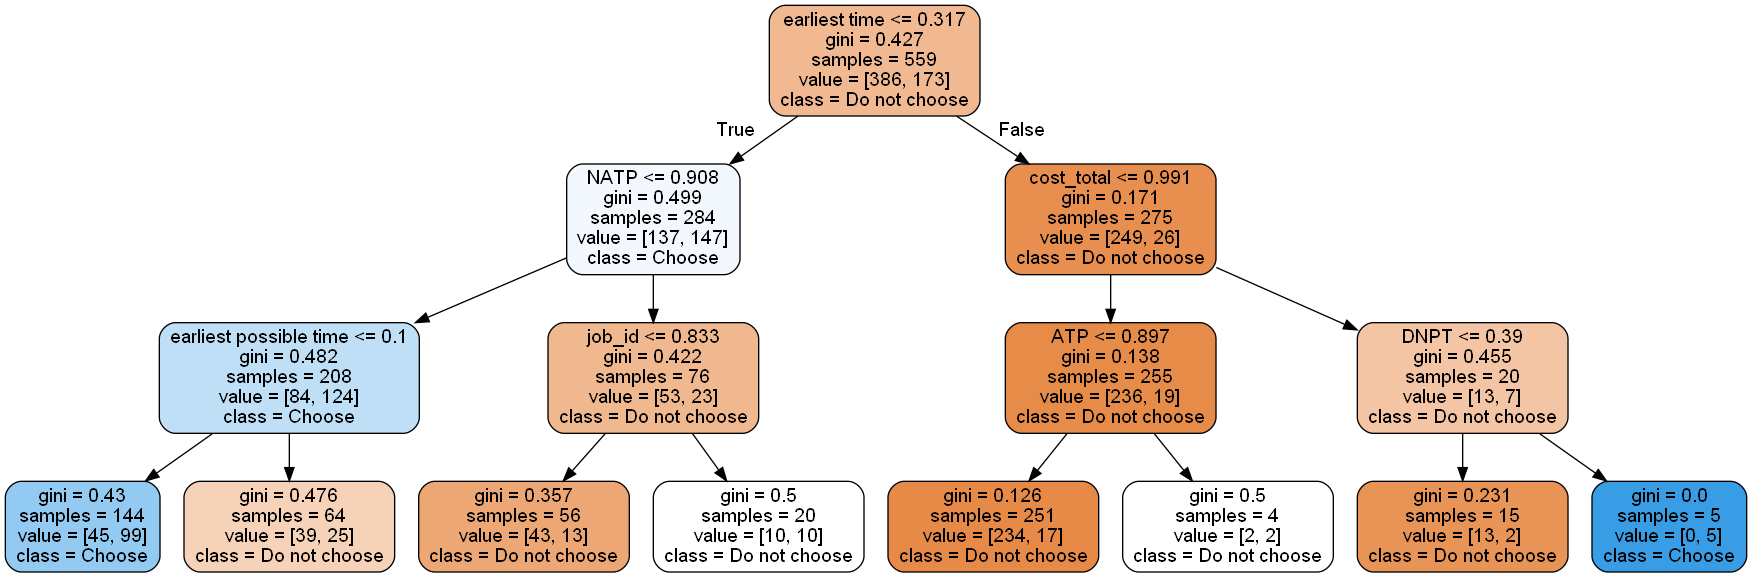

In [27]:
print('tree with gini with deth of 3')
bestVals = (0,0)
columns = dataActs['feature_names']

bestVals = doTree(dataActs, maxDepth = 3, randomS = i)
visualize_tree(bestVals[1], columns)
tree1 = bestVals[1]

tree with gini and impurity decrease
Using a Decision Tree
0.9426229508196722
Using a Decision Tree
0.9426229508196722
Using a Decision Tree
0.9426229508196722


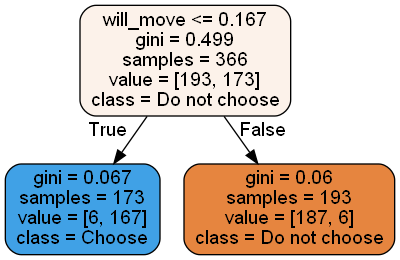

In [28]:
print('tree with gini and impurity decrease')
columns = train_dataPM['feature_names']
bestVals = (0,0)
for i in randStates:
    tempVals = doTree(train_dataPM, test_dataPM, True, False, randomS = i)
    if tempVals[0] > bestVals[0]:
        bestVals = tempVals
visualize_tree(bestVals[1], columns)
tree2 = bestVals[1]

In [29]:
btree1 = lambda x: tree1.predict([x])
btree2 = lambda x: tree2.predict([x])
tests.addSolver(ML_solver(id, btree1, btree2),0,"by player 2, pre movement"+str(i))

doing jssp 0
doing jssp 1
doing jssp 2
doing jssp 3
doing jssp 4
doing jssp 5
doing jssp 6
doing jssp 7
doing jssp 8
doing jssp 9
doing jssp 10
doing jssp 11
doing jssp 12
doing jssp 13
doing jssp 14
doing jssp 15
doing jssp 16
doing jssp 17
doing jssp 18


In [30]:
datagroup = by_player["29"]
dataActs = {}
dataMachines = {}
datapreMachines = {}
dataStates = {}
idd = 0
for i in datagroup:
    currJss = JSSProblem(idd, i[0], file_solver(idd, i[1], i[0]["act_info"]) , dataActs,dataMachines,dataStates, datapreMachines)
    idd+=1
    
division = .60
if division>0:
    dAP = math.floor(len(dataActs['target'])*division)
    dM = math.floor(len(dataMachines['target'])*division)
    dSP = math.floor(len(dataStates['target'])*division)
    dPMP = math.floor(len(datapreMachines['target'])*division)
    #pre
    train_dataA = {'data': dataActs['data'][:dAP], 'target': dataActs['target'][:dAP], 'feature_names': dataActs['feature_names']}
    test_dataA = {'data': dataActs['data'][dAP:], 'target': dataActs['target'][dAP:], 'feature_names': dataActs['feature_names']}

    train_dataM = {'data': dataMachines['data'][:dM], 'target': dataMachines['target'][:dM], 'feature_names': dataMachines['feature_names']}
    test_dataM = {'data': dataMachines['data'][dM:], 'target': dataMachines['target'][dM:], 'feature_names': dataMachines['feature_names']}

    dataStates['feature_names'] = dataStates['feature_names'][:8] + dataStates['feature_names'][9:]
    for i in range(len(dataStates['data'])):
        dataStates['data'][i] = dataStates['data'][i][:8] + dataStates['data'][i][9:]

    train_dataS = {'data': dataStates['data'][:dSP], 'target': dataStates['target'][:dSP], 'feature_names': dataStates['feature_names']}
    test_dataS = {'data': dataStates['data'][dSP:], 'target': dataStates['target'][dSP:], 'feature_names': dataStates['feature_names']}

    train_dataPM = {'data': datapreMachines['data'][:dPMP], 'target': datapreMachines['target'][:dPMP], 'feature_names': datapreMachines['feature_names']}
    test_dataPM = {'data': datapreMachines['data'][dPMP:], 'target': datapreMachines['target'][dPMP:], 'feature_names': datapreMachines['feature_names']}


    
#no mayor changes were found using various random states
randStates = [0, 1234, 54321]


tree with gini
Using a Decision Tree
0.8426395939086294
Using a Decision Tree
0.8426395939086294
Using a Decision Tree
0.8426395939086294


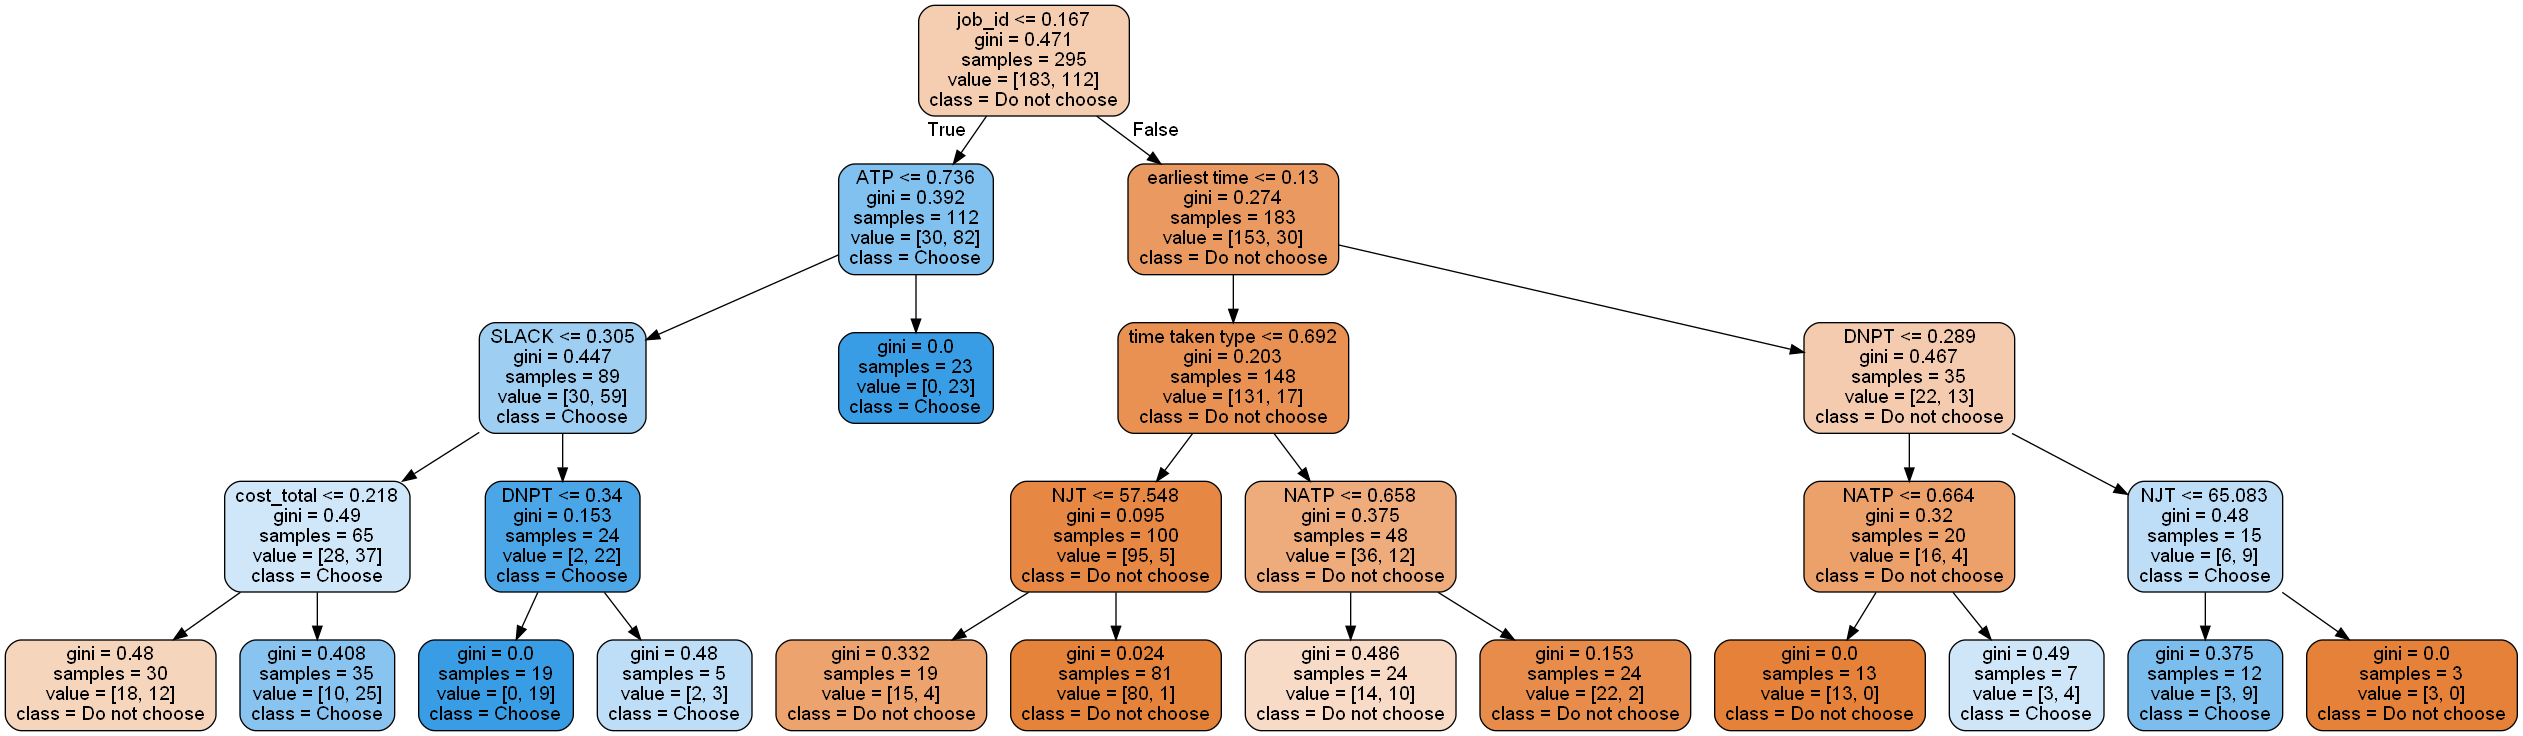

In [31]:
print('tree with gini')
columns = train_dataS['feature_names']
bestVals = (0,0)
for i in randStates:
    tempVals = doTree(train_dataS, test_dataS, randomS = i)
    if tempVals[0] > bestVals[0]:
        bestVals = tempVals
visualize_tree(bestVals[1], columns)
tree1 = bestVals[1]

tree with gini
Using a Decision Tree
0.8865248226950354
Using a Decision Tree
0.8865248226950354
Using a Decision Tree
0.8865248226950354


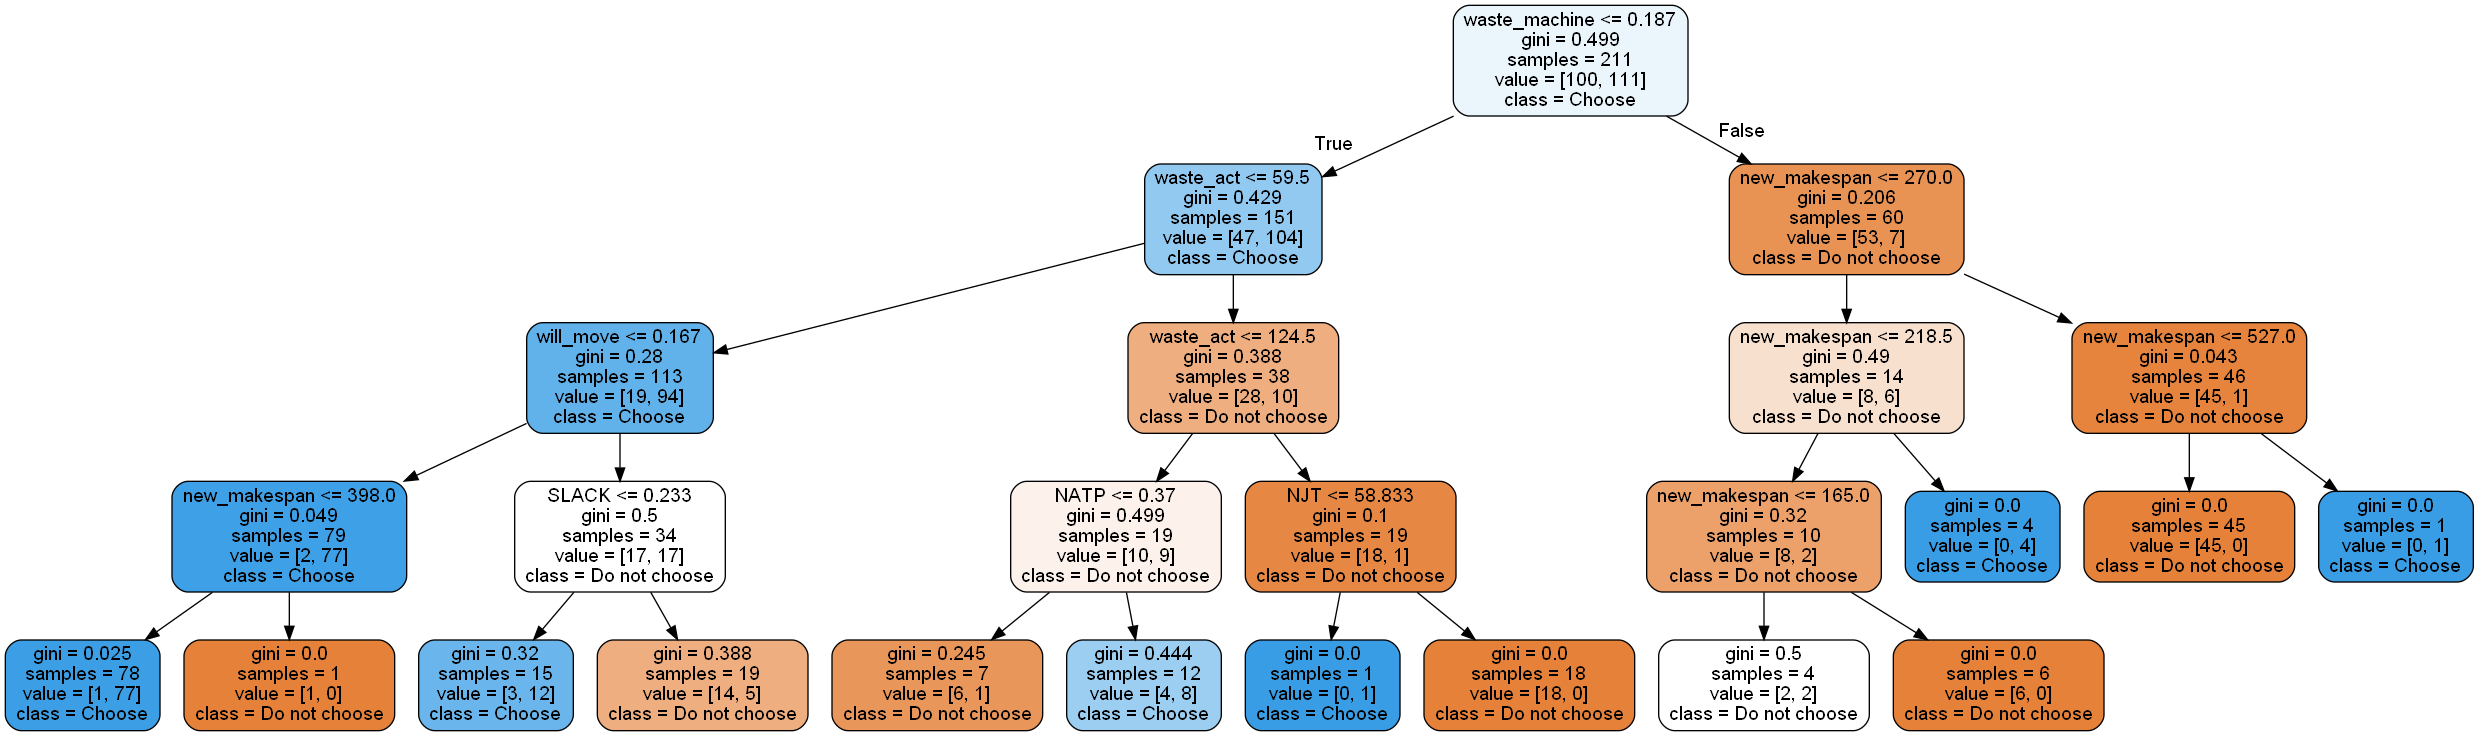

In [32]:
print('tree with gini')
columns = train_dataM['feature_names']
bestVals = (0,0)
for i in randStates:
    tempVals = doTree(train_dataM, test_dataM, randomS = i)
    if tempVals[0] > bestVals[0]:
        bestVals = tempVals
visualize_tree(bestVals[1], columns)
tree2 = bestVals[1]

In [38]:
btree1 = lambda x: tree1.predict([x])
btree2 = lambda x: tree2.predict([x])
tests.addSolver(postactivity_solver(id, btree1, btree2),0,"by player 29, post movement"+str(i))

doing jssp 0
doing jssp 1
doing jssp 2
doing jssp 3
doing jssp 4
doing jssp 5
doing jssp 6
doing jssp 7
doing jssp 8
doing jssp 9
doing jssp 10
doing jssp 11
doing jssp 12
doing jssp 13
doing jssp 14
doing jssp 15
doing jssp 16
doing jssp 17
doing jssp 18


In [39]:
datagroup = by_good_player["29"]
dataActs = {}
dataMachines = {}
datapreMachines = {}
dataStates = {}
idd = 0
for i in datagroup:
    currJss = JSSProblem(idd, i[0], file_solver(idd, i[1], i[0]["act_info"]) , dataActs,dataMachines,dataStates, datapreMachines)
    idd+=1
    
division = .60
if division>0:
    dAP = math.floor(len(dataActs['target'])*division)
    dM = math.floor(len(dataMachines['target'])*division)
    dSP = math.floor(len(dataStates['target'])*division)
    dPMP = math.floor(len(datapreMachines['target'])*division)
    #pre
    train_dataA = {'data': dataActs['data'][:dAP], 'target': dataActs['target'][:dAP], 'feature_names': dataActs['feature_names']}
    test_dataA = {'data': dataActs['data'][dAP:], 'target': dataActs['target'][dAP:], 'feature_names': dataActs['feature_names']}

    train_dataM = {'data': dataMachines['data'][:dM], 'target': dataMachines['target'][:dM], 'feature_names': dataMachines['feature_names']}
    test_dataM = {'data': dataMachines['data'][dM:], 'target': dataMachines['target'][dM:], 'feature_names': dataMachines['feature_names']}

    dataStates['feature_names'] = dataStates['feature_names'][:8] + dataStates['feature_names'][9:]
    for i in range(len(dataStates['data'])):
        dataStates['data'][i] = dataStates['data'][i][:8] + dataStates['data'][i][9:]

    train_dataS = {'data': dataStates['data'][:dSP], 'target': dataStates['target'][:dSP], 'feature_names': dataStates['feature_names']}
    test_dataS = {'data': dataStates['data'][dSP:], 'target': dataStates['target'][dSP:], 'feature_names': dataStates['feature_names']}

    train_dataPM = {'data': datapreMachines['data'][:dPMP], 'target': datapreMachines['target'][:dPMP], 'feature_names': datapreMachines['feature_names']}
    test_dataPM = {'data': datapreMachines['data'][dPMP:], 'target': datapreMachines['target'][dPMP:], 'feature_names': datapreMachines['feature_names']}


    
#no mayor changes were found using various random states
randStates = [0, 1234, 54321]


tree with gini
Using a Decision Tree
0.9381443298969072
Using a Decision Tree
0.9381443298969072
Using a Decision Tree
0.9381443298969072


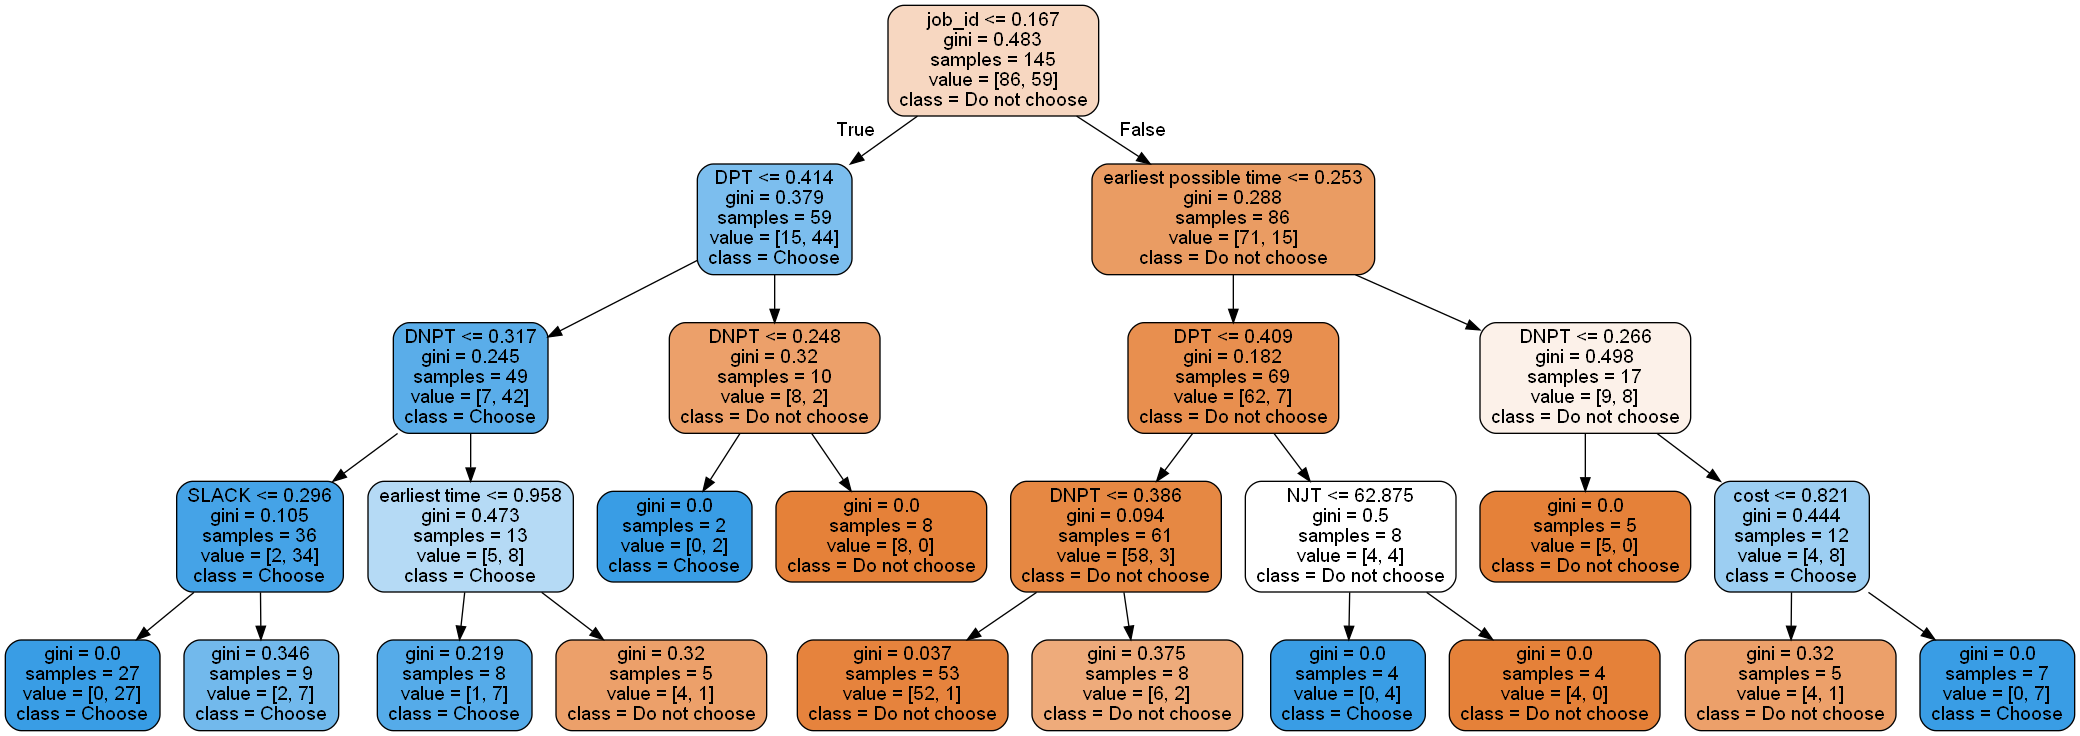

In [40]:
print('tree with gini')
columns = train_dataS['feature_names']
bestVals = (0,0)
for i in randStates:
    tempVals = doTree(train_dataS, test_dataS, randomS = i)
    if tempVals[0] > bestVals[0]:
        bestVals = tempVals
visualize_tree(bestVals[1], columns)
tree1 = bestVals[1]

tree with gini
Using a Decision Tree
0.925
Using a Decision Tree
0.925
Using a Decision Tree
0.925


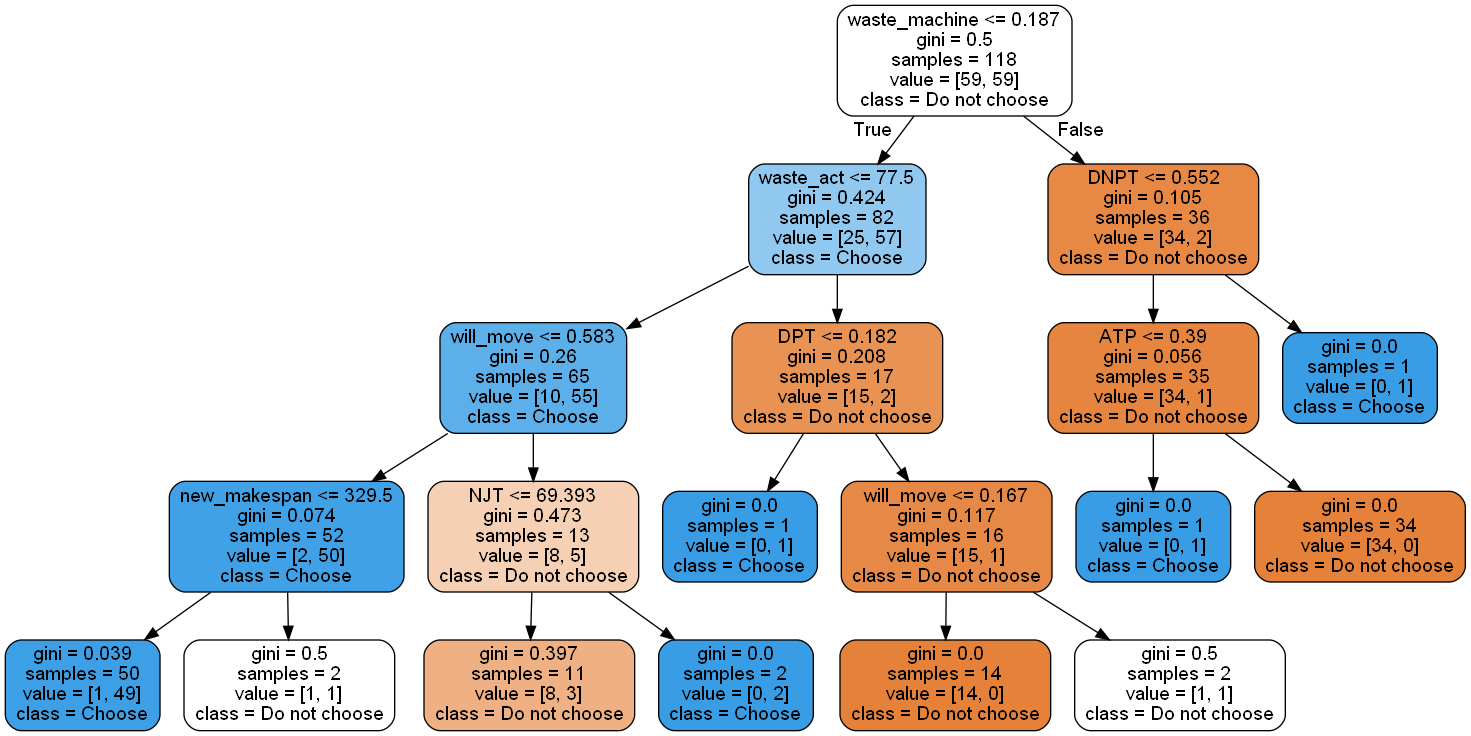

In [41]:
print('tree with gini')
columns = train_dataM['feature_names']
bestVals = (0,0)
for i in randStates:
    tempVals = doTree(train_dataM, test_dataM, randomS = i)
    if tempVals[0] > bestVals[0]:
        bestVals = tempVals
visualize_tree(bestVals[1], columns)
tree2 = bestVals[1]

In [42]:
btree1 = lambda x: tree1.predict([x])
btree2 = lambda x: tree2.predict([x])
tests.addSolver(postactivity_solver(id, btree1, btree2),0,"by good player 29, post movement"+str(i))

doing jssp 0
doing jssp 1
doing jssp 2
doing jssp 3
doing jssp 4
doing jssp 5
doing jssp 6
doing jssp 7
doing jssp 8
doing jssp 9
doing jssp 10
doing jssp 11
doing jssp 12
doing jssp 13
doing jssp 14
doing jssp 15
doing jssp 16
doing jssp 17
doing jssp 18


In [43]:
datagroup = by_s_good_player["29"]
dataActs = {}
dataMachines = {}
datapreMachines = {}
dataStates = {}
idd = 0
for i in datagroup:
    currJss = JSSProblem(idd, i[0], file_solver(idd, i[1], i[0]["act_info"]) , dataActs,dataMachines,dataStates, datapreMachines)
    idd+=1
    
division = .60
if division>0:
    dAP = math.floor(len(dataActs['target'])*division)
    dM = math.floor(len(dataMachines['target'])*division)
    dSP = math.floor(len(dataStates['target'])*division)
    dPMP = math.floor(len(datapreMachines['target'])*division)
    #pre
    train_dataA = {'data': dataActs['data'][:dAP], 'target': dataActs['target'][:dAP], 'feature_names': dataActs['feature_names']}
    test_dataA = {'data': dataActs['data'][dAP:], 'target': dataActs['target'][dAP:], 'feature_names': dataActs['feature_names']}

    train_dataM = {'data': dataMachines['data'][:dM], 'target': dataMachines['target'][:dM], 'feature_names': dataMachines['feature_names']}
    test_dataM = {'data': dataMachines['data'][dM:], 'target': dataMachines['target'][dM:], 'feature_names': dataMachines['feature_names']}

    dataStates['feature_names'] = dataStates['feature_names'][:8] + dataStates['feature_names'][9:]
    for i in range(len(dataStates['data'])):
        dataStates['data'][i] = dataStates['data'][i][:8] + dataStates['data'][i][9:]

    train_dataS = {'data': dataStates['data'][:dSP], 'target': dataStates['target'][:dSP], 'feature_names': dataStates['feature_names']}
    test_dataS = {'data': dataStates['data'][dSP:], 'target': dataStates['target'][dSP:], 'feature_names': dataStates['feature_names']}

    train_dataPM = {'data': datapreMachines['data'][:dPMP], 'target': datapreMachines['target'][:dPMP], 'feature_names': datapreMachines['feature_names']}
    test_dataPM = {'data': datapreMachines['data'][dPMP:], 'target': datapreMachines['target'][dPMP:], 'feature_names': datapreMachines['feature_names']}


    
#no mayor changes were found using various random states
randStates = [0, 1234, 54321]


tree with gini
Using a Decision Tree
0.9795918367346939
Using a Decision Tree
0.9795918367346939
Using a Decision Tree
0.9387755102040817


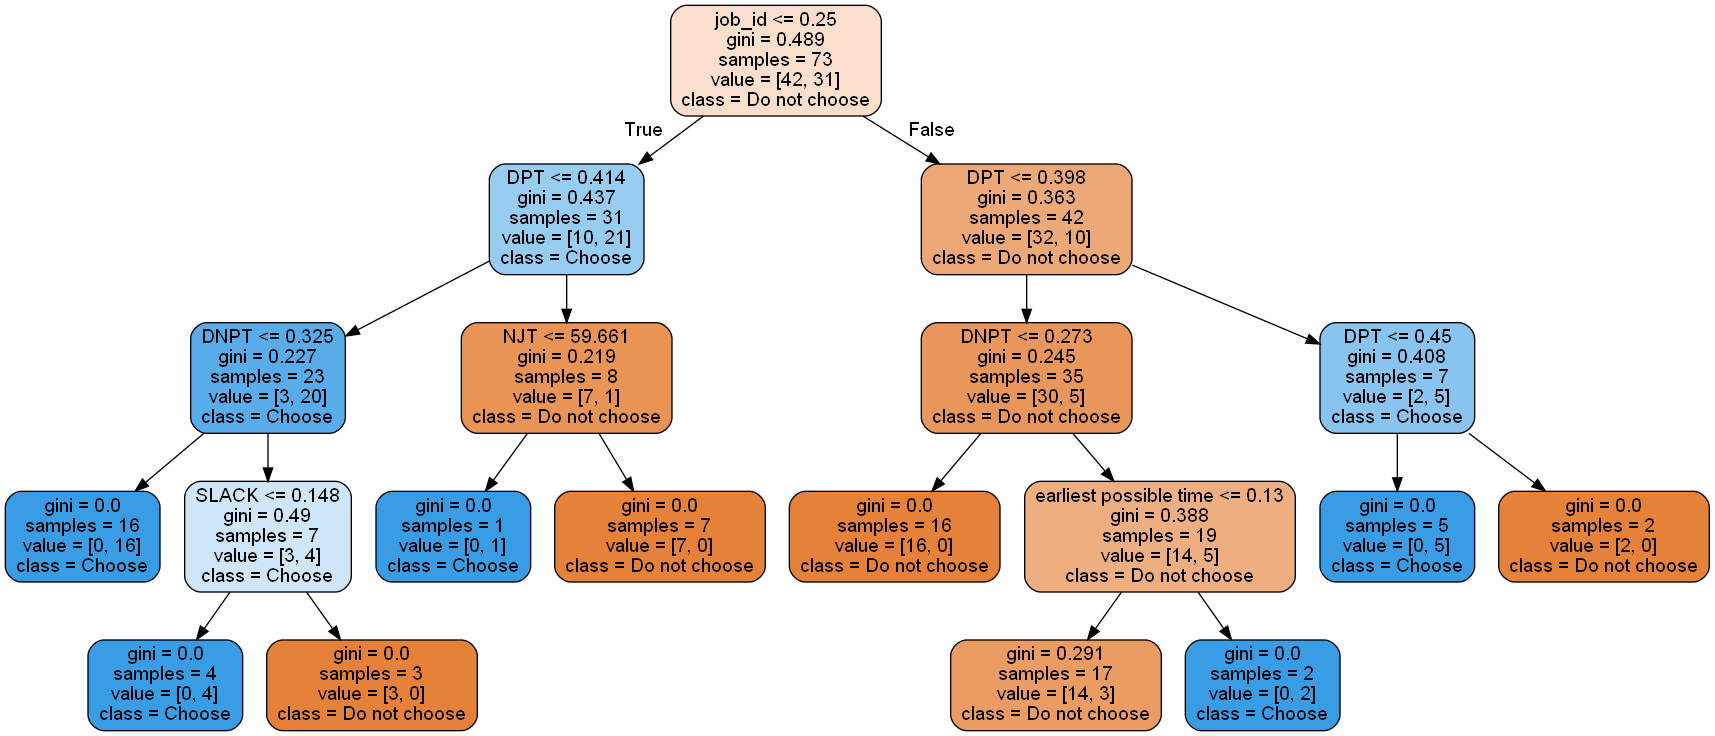

In [44]:
print('tree with gini')
columns = train_dataS['feature_names']
bestVals = (0,0)
for i in randStates:
    tempVals = doTree(train_dataS, test_dataS, randomS = i)
    if tempVals[0] > bestVals[0]:
        bestVals = tempVals
visualize_tree(bestVals[1], columns)
tree1 = bestVals[1]

tree with gini
Using a Decision Tree
0.9772727272727273
Using a Decision Tree
0.9772727272727273
Using a Decision Tree
0.9772727272727273


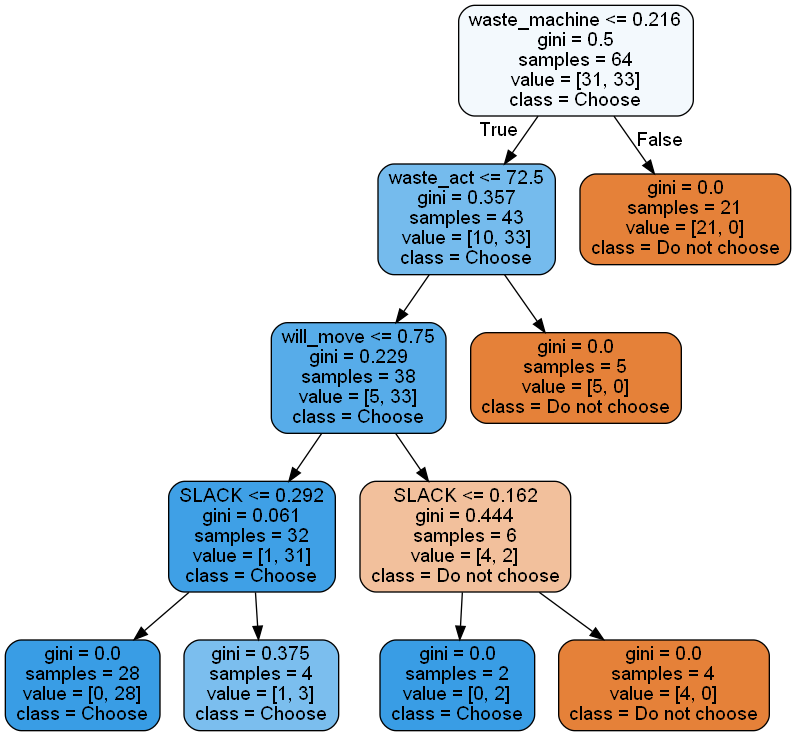

In [45]:
print('tree with gini')
columns = train_dataM['feature_names']
bestVals = (0,0)
for i in randStates:
    tempVals = doTree(train_dataM, test_dataM, randomS = i)
    if tempVals[0] > bestVals[0]:
        bestVals = tempVals
visualize_tree(bestVals[1], columns)
tree2 = bestVals[1]

In [46]:
btree1 = lambda x: tree1.predict([x])
btree2 = lambda x: tree2.predict([x])
tests.addSolver(postactivity_solver(id, btree1, btree2),0,"by best player 29, post movement"+str(i))

doing jssp 0
doing jssp 1
doing jssp 2
doing jssp 3
doing jssp 4
doing jssp 5
doing jssp 6
doing jssp 7
doing jssp 8
doing jssp 9
doing jssp 10
doing jssp 11
doing jssp 12
doing jssp 13
doing jssp 14
doing jssp 15
doing jssp 16
doing jssp 17
doing jssp 18


In [47]:
datagroup = by_s_good_player["38"]
dataActs = {}
dataMachines = {}
datapreMachines = {}
dataStates = {}
idd = 0
for i in datagroup:
    currJss = JSSProblem(idd, i[0], file_solver(idd, i[1], i[0]["act_info"]) , dataActs,dataMachines,dataStates, datapreMachines)
    idd+=1
    
division = .60
if division>0:
    dAP = math.floor(len(dataActs['target'])*division)
    dM = math.floor(len(dataMachines['target'])*division)
    dSP = math.floor(len(dataStates['target'])*division)
    dPMP = math.floor(len(datapreMachines['target'])*division)
    #pre
    train_dataA = {'data': dataActs['data'][:dAP], 'target': dataActs['target'][:dAP], 'feature_names': dataActs['feature_names']}
    test_dataA = {'data': dataActs['data'][dAP:], 'target': dataActs['target'][dAP:], 'feature_names': dataActs['feature_names']}

    train_dataM = {'data': dataMachines['data'][:dM], 'target': dataMachines['target'][:dM], 'feature_names': dataMachines['feature_names']}
    test_dataM = {'data': dataMachines['data'][dM:], 'target': dataMachines['target'][dM:], 'feature_names': dataMachines['feature_names']}

    dataStates['feature_names'] = dataStates['feature_names'][:8] + dataStates['feature_names'][9:]
    for i in range(len(dataStates['data'])):
        dataStates['data'][i] = dataStates['data'][i][:8] + dataStates['data'][i][9:]

    train_dataS = {'data': dataStates['data'][:dSP], 'target': dataStates['target'][:dSP], 'feature_names': dataStates['feature_names']}
    test_dataS = {'data': dataStates['data'][dSP:], 'target': dataStates['target'][dSP:], 'feature_names': dataStates['feature_names']}

    train_dataPM = {'data': datapreMachines['data'][:dPMP], 'target': datapreMachines['target'][:dPMP], 'feature_names': datapreMachines['feature_names']}
    test_dataPM = {'data': datapreMachines['data'][dPMP:], 'target': datapreMachines['target'][dPMP:], 'feature_names': datapreMachines['feature_names']}


    
#no mayor changes were found using various random states
randStates = [0, 1234, 54321]


tree with gini
Using a Decision Tree
0.9516129032258065
Using a Decision Tree
0.9516129032258065
Using a Decision Tree
0.9516129032258065


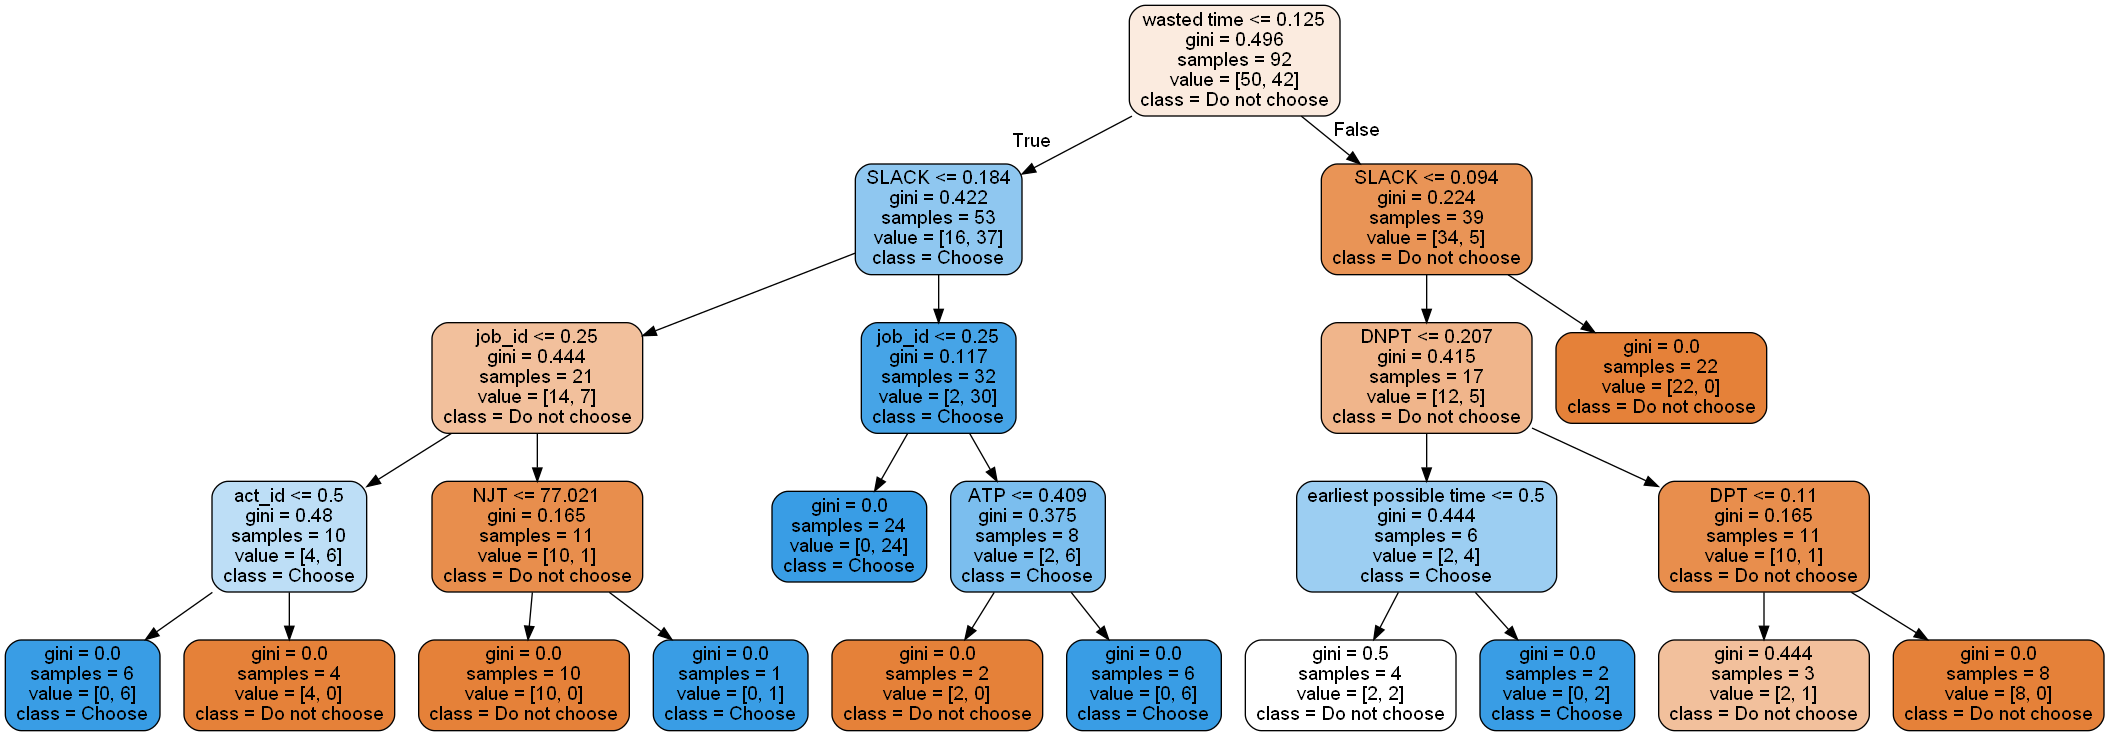

In [48]:
print('tree with gini')
columns = train_dataS['feature_names']
bestVals = (0,0)
for i in randStates:
    tempVals = doTree(train_dataS, test_dataS, randomS = i)
    if tempVals[0] > bestVals[0]:
        bestVals = tempVals
visualize_tree(bestVals[1], columns)
tree1 = bestVals[1]

tree with gini
Using a Decision Tree
0.8571428571428571
Using a Decision Tree
0.8571428571428571
Using a Decision Tree
0.8571428571428571


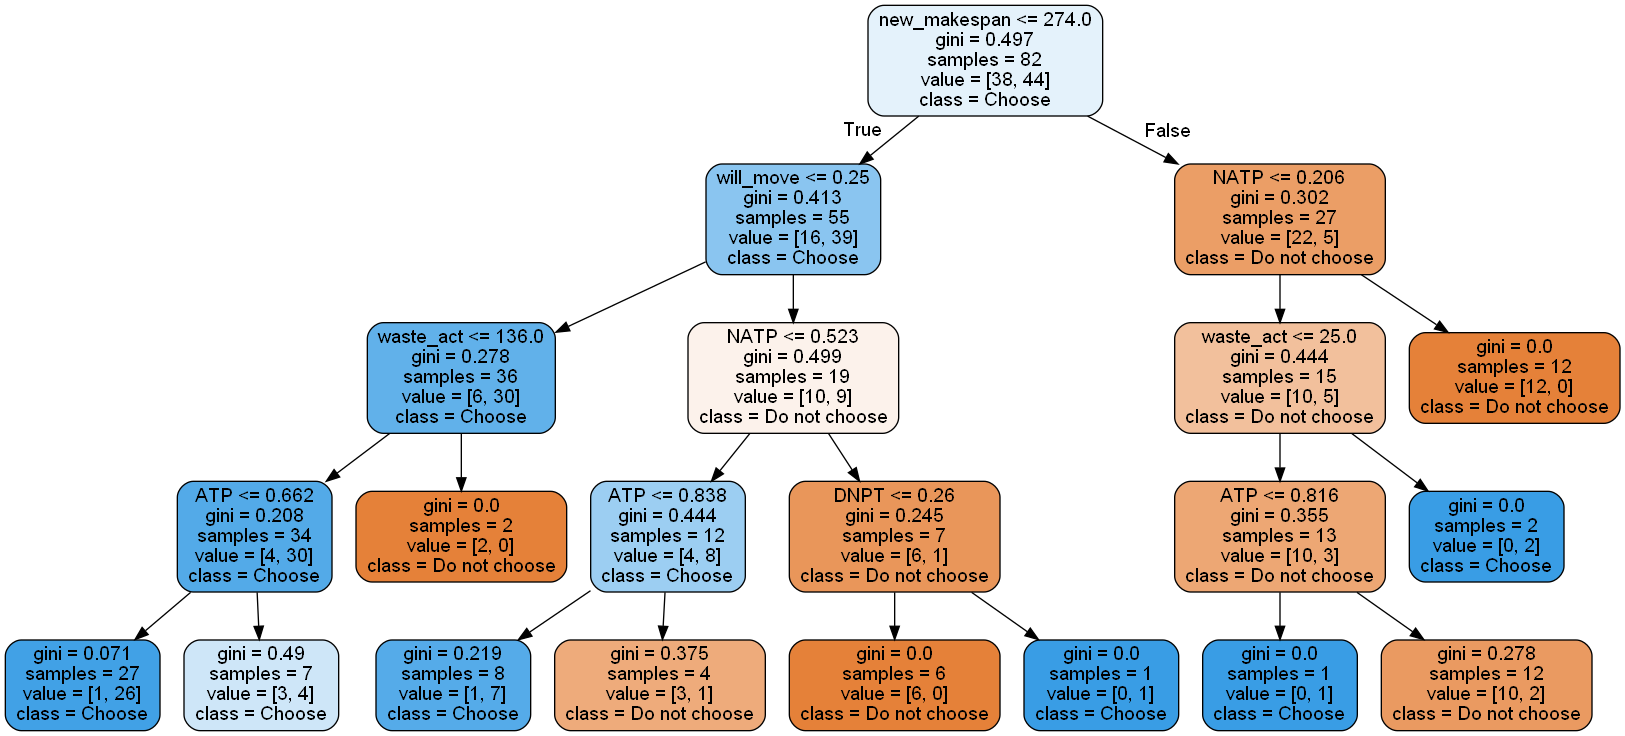

In [49]:
print('tree with gini')
columns = train_dataM['feature_names']
bestVals = (0,0)
for i in randStates:
    tempVals = doTree(train_dataM, test_dataM, randomS = i)
    if tempVals[0] > bestVals[0]:
        bestVals = tempVals
visualize_tree(bestVals[1], columns)
tree2 = bestVals[1]

In [50]:
btree1 = lambda x: tree1.predict([x])
btree2 = lambda x: tree2.predict([x])
tests.addSolver(postactivity_solver(id, btree1, btree2),0,"by best player 38, post movement"+str(i))

doing jssp 0
doing jssp 1
doing jssp 2
doing jssp 3
doing jssp 4
doing jssp 5
doing jssp 6
doing jssp 7
doing jssp 8
doing jssp 9
doing jssp 10
doing jssp 11
doing jssp 12
doing jssp 13
doing jssp 14
doing jssp 15
doing jssp 16
doing jssp 17
doing jssp 18


In [51]:
datagroup = last_good_games["3"]
dataActs = {}
dataMachines = {}
datapreMachines = {}
dataStates = {}
idd = 0
for i in datagroup:
    currJss = JSSProblem(idd, i[0], file_solver(idd, i[1], i[0]["act_info"]) , dataActs,dataMachines,dataStates, datapreMachines)
    idd+=1
    
division = .60
if division>0:
    dAP = math.floor(len(dataActs['target'])*division)
    dM = math.floor(len(dataMachines['target'])*division)
    dSP = math.floor(len(dataStates['target'])*division)
    dPMP = math.floor(len(datapreMachines['target'])*division)
    #pre
    train_dataA = {'data': dataActs['data'][:dAP], 'target': dataActs['target'][:dAP], 'feature_names': dataActs['feature_names']}
    test_dataA = {'data': dataActs['data'][dAP:], 'target': dataActs['target'][dAP:], 'feature_names': dataActs['feature_names']}

    train_dataM = {'data': dataMachines['data'][:dM], 'target': dataMachines['target'][:dM], 'feature_names': dataMachines['feature_names']}
    test_dataM = {'data': dataMachines['data'][dM:], 'target': dataMachines['target'][dM:], 'feature_names': dataMachines['feature_names']}

    dataStates['feature_names'] = dataStates['feature_names'][:8] + dataStates['feature_names'][9:]
    for i in range(len(dataStates['data'])):
        dataStates['data'][i] = dataStates['data'][i][:8] + dataStates['data'][i][9:]

    train_dataS = {'data': dataStates['data'][:dSP], 'target': dataStates['target'][:dSP], 'feature_names': dataStates['feature_names']}
    test_dataS = {'data': dataStates['data'][dSP:], 'target': dataStates['target'][dSP:], 'feature_names': dataStates['feature_names']}

    train_dataPM = {'data': datapreMachines['data'][:dPMP], 'target': datapreMachines['target'][:dPMP], 'feature_names': datapreMachines['feature_names']}
    test_dataPM = {'data': datapreMachines['data'][dPMP:], 'target': datapreMachines['target'][dPMP:], 'feature_names': datapreMachines['feature_names']}


    
#no mayor changes were found using various random states
randStates = [0, 1234, 54321]


tree with gini with deth of 3
Using a Decision Tree
0.792
Using a Decision Tree
0.792
Using a Decision Tree
0.792


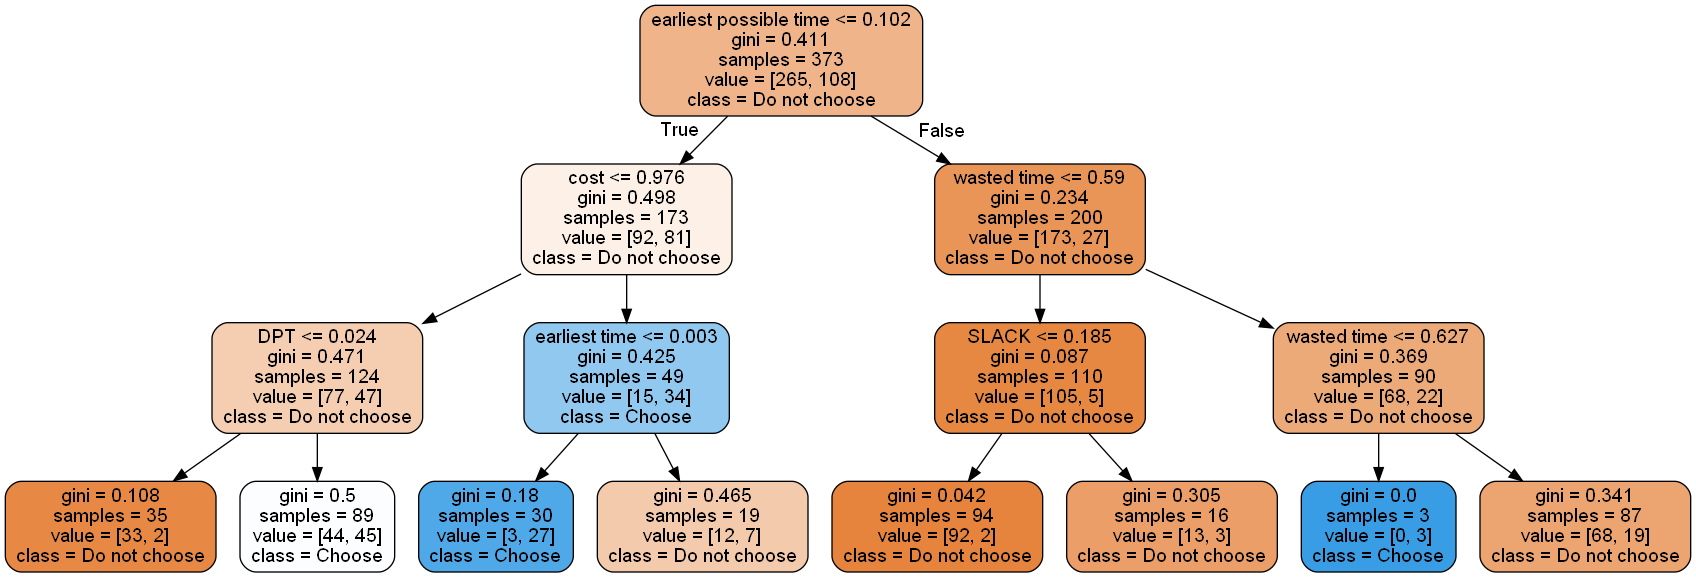

In [52]:
print('tree with gini with deth of 3')
bestVals = (0,0)
columns = train_dataA['feature_names']
for i in randStates:
    tempVals = doTree(train_dataA, test_dataA, maxDepth = 3, randomS = i)
    if tempVals[0] > bestVals[0]:
        bestVals = tempVals
visualize_tree(bestVals[1], columns)
tree1 = bestVals[1]

tree with gini and impurity decrease
Using a Decision Tree
0.9746835443037974
Using a Decision Tree
0.9746835443037974
Using a Decision Tree
0.9746835443037974


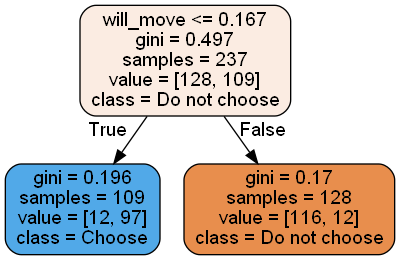

In [53]:
print('tree with gini and impurity decrease')
columns = train_dataPM['feature_names']
bestVals = (0,0)
for i in randStates:
    tempVals = doTree(train_dataPM, test_dataPM, True, False, randomS = i)
    if tempVals[0] > bestVals[0]:
        bestVals = tempVals
visualize_tree(bestVals[1], columns)
tree2 = bestVals[1]

In [54]:
btree1 = lambda x: tree1.predict([x])
btree2 = lambda x: tree2.predict([x])
tests.addSolver(activity_solver(id, btree1, btree2),0,"last good of 3, pre movement"+str(i))

doing jssp 0
doing jssp 1
doing jssp 2
doing jssp 3
doing jssp 4
doing jssp 5
doing jssp 6
doing jssp 7
doing jssp 8
doing jssp 9
doing jssp 10
doing jssp 11
doing jssp 12
doing jssp 13
doing jssp 14
doing jssp 15
doing jssp 16
doing jssp 17
doing jssp 18


In [55]:
tests.dump()

{'id': 0, 'name': 'Earliest Activity', 'accuracy': 100, 'evaluation': [307, 304, 244, 304, 300, 378, 384, 487, 527, 490, 1575, 1457, 1528, 1812, 1788, 1825, 1001, 1070, 810]}
{'id': 1, 'name': 'shortest activity', 'accuracy': 100, 'evaluation': [489, 288, 464, 331, 526, 470, 475, 912, 693, 969, 6146, 6801, 6642, 8402, 9415, 9190, 1906, 2662, 2650]}
{'id': 2, 'name': 'Longest activity', 'accuracy': 100, 'evaluation': [498, 258, 487, 527, 568, 593, 577, 1116, 1018, 1006, 6401, 7319, 7269, 9248, 8668, 10245, 3055, 3643, 2949]}
{'id': 3, 'name': 'longest job', 'accuracy': 100, 'evaluation': [337, 327, 279, 304, 494, 389, 505, 493, 540, 487, 1946, 1725, 1739, 2313, 2335, 2089, 1081, 1223, 988]}
{'id': 4, 'name': 'most loaded', 'accuracy': 100, 'evaluation': [344, 309, 244, 266, 300, 519, 341, 603, 511, 639, 5393, 5664, 4537, 7081, 7660, 7399, 2150, 2782, 2136]}
{'id': 5, 'name': 'least loaded', 'accuracy': 100, 'evaluation': [333, 309, 244, 304, 300, 378, 384, 487, 540, 537, 1678, 1645, 154

In [56]:
datagroup = complete_games
dataActs = {}
dataMachines = {}
datapreMachines = {}
dataStates = {}
idd = 0
for i in datagroup:
    currJss = JSSProblem(idd, i[0], file_solver(idd, i[1], i[0]["act_info"]) , dataActs,dataMachines,dataStates, datapreMachines)
    idd+=1
    
division = .60
if division>0:
    dAP = math.floor(len(dataActs['target'])*division)
    dM = math.floor(len(dataMachines['target'])*division)
    dSP = math.floor(len(dataStates['target'])*division)
    dPMP = math.floor(len(datapreMachines['target'])*division)
    #pre
    train_dataA = {'data': dataActs['data'][:dAP], 'target': dataActs['target'][:dAP], 'feature_names': dataActs['feature_names']}
    test_dataA = {'data': dataActs['data'][dAP:], 'target': dataActs['target'][dAP:], 'feature_names': dataActs['feature_names']}

    train_dataM = {'data': dataMachines['data'][:dM], 'target': dataMachines['target'][:dM], 'feature_names': dataMachines['feature_names']}
    test_dataM = {'data': dataMachines['data'][dM:], 'target': dataMachines['target'][dM:], 'feature_names': dataMachines['feature_names']}

    dataStates['feature_names'] = dataStates['feature_names'][:8] + dataStates['feature_names'][9:]
    for i in range(len(dataStates['data'])):
        dataStates['data'][i] = dataStates['data'][i][:8] + dataStates['data'][i][9:]

    train_dataS = {'data': dataStates['data'][:dSP], 'target': dataStates['target'][:dSP], 'feature_names': dataStates['feature_names']}
    test_dataS = {'data': dataStates['data'][dSP:], 'target': dataStates['target'][dSP:], 'feature_names': dataStates['feature_names']}

    train_dataPM = {'data': datapreMachines['data'][:dPMP], 'target': datapreMachines['target'][:dPMP], 'feature_names': datapreMachines['feature_names']}
    test_dataPM = {'data': datapreMachines['data'][dPMP:], 'target': datapreMachines['target'][dPMP:], 'feature_names': datapreMachines['feature_names']}


    
#no mayor changes were found using various random states
randStates = [0, 1234, 54321]


tree with gini with deth of 3
Using a Decision Tree
0.8871695680206318
Using a Decision Tree
0.8871695680206318
Using a Decision Tree
0.8871695680206318


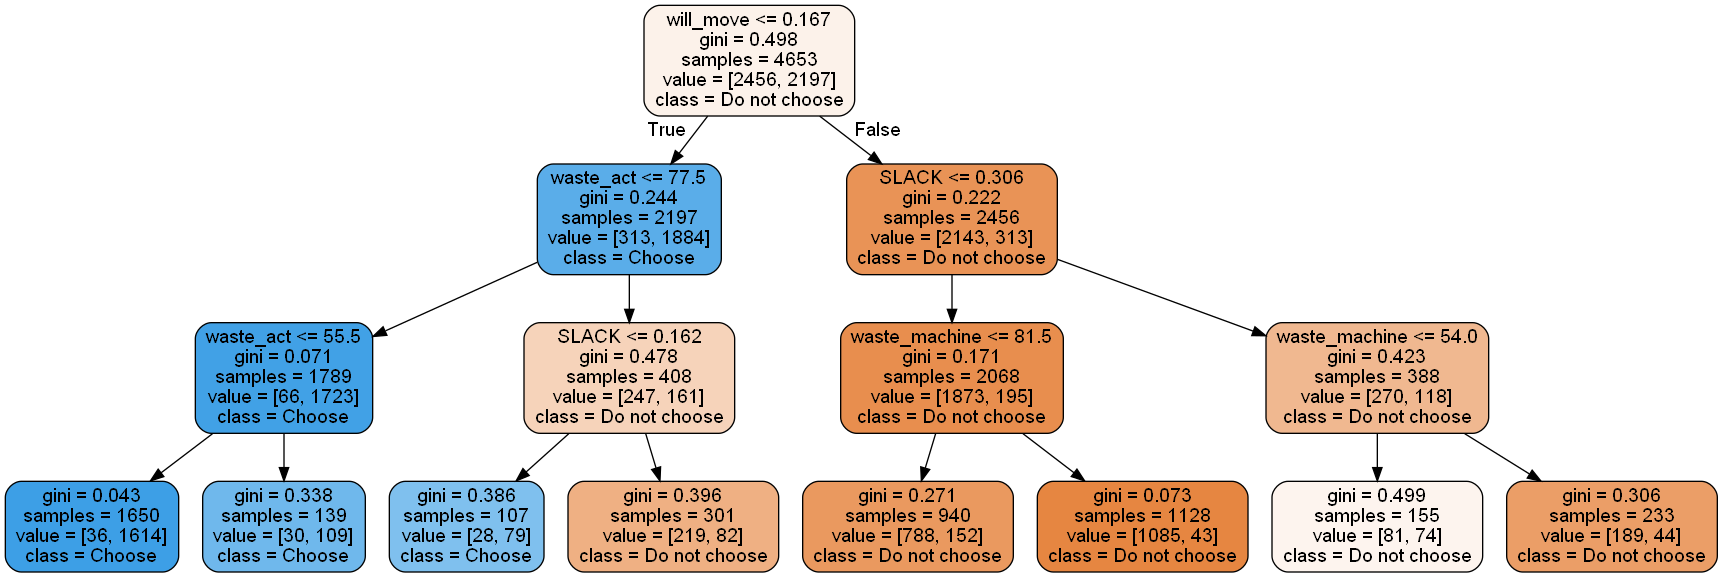

In [59]:
print('tree with gini with deth of 3')
bestVals = (0,0)
columns = train_dataPM['feature_names']
for i in randStates:
    tempVals = doTree(train_dataPM, test_dataPM, maxDepth = 3, randomS = i)
    if tempVals[0] > bestVals[0]:
        bestVals = tempVals
visualize_tree(bestVals[1], columns)


tree with gini
Using a Decision Tree
0.7044735652959783
Using a Decision Tree
0.7044735652959783
Using a Decision Tree
0.7044735652959783


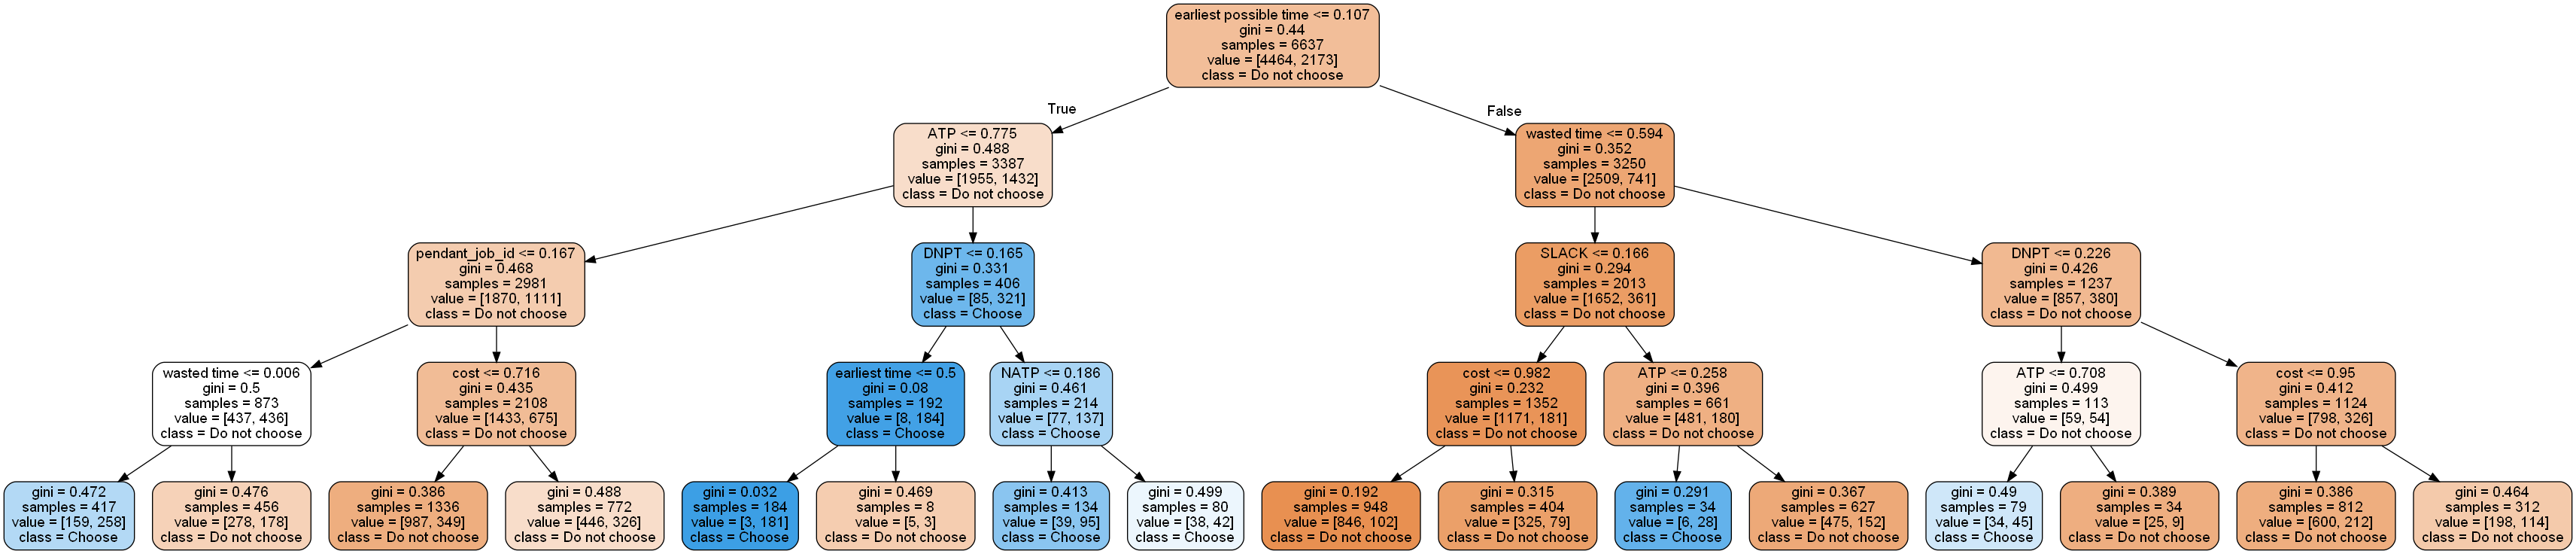

In [60]:
print('tree with gini')
columns = train_dataA['feature_names']
bestVals = (0,0)
for i in randStates:
    tempVals = doTree(train_dataA, test_dataA, randomS = i)
    if tempVals[0] > bestVals[0]:
        bestVals = tempVals
visualize_tree(bestVals[1], columns)


In [ ]:
idd = 0
    for i in data_group:
        #print("doing game", i)
        currJss = JSSProblem(idd, i[0], file_solver(idd, i[1], i[0]["act_info"]) , dataActs,dataMachines,dataStates, datapreMachines)
        
        modified_steps = orderedSteps(currJss.machines)
        
        JSSProblem(idd, i[0], m_solver(idd, modified_steps) , data_acts= data_modified_pre, data_state = data_modified_post)
        idd+=1

In [12]:
datagroup = by_good_player["29"]
dataActs = {}
dataMachines = {}
datapreMachines = {}
dataStates = {}
data_modified_pre = {}
data_modified_post = {}
idd = 0
for i in datagroup:
    currJss = JSSProblem(idd, i[0], file_solver(idd, i[1], i[0]["act_info"]) , dataActs,dataMachines,dataStates, datapreMachines)
    modified_steps = orderedSteps(currJss.machines)   
    JSSProblem(idd, i[0], m_solver(idd, modified_steps) , data_acts= data_modified_pre, data_state = data_modified_post)
     
    idd+=1
    
division = .60
if division>0:
    dAP = math.floor(len(dataActs['target'])*division)
    dM = math.floor(len(dataMachines['target'])*division)
    dSP = math.floor(len(dataStates['target'])*division)
    dPMP = math.floor(len(datapreMachines['target'])*division)
    dMP = math.floor(len(data_modified_pre['target'])*division)
    dMA = math.floor(len(data_modified_post['target'])*division)
    #pre
    train_dataA = {'data': dataActs['data'][:dAP], 'target': dataActs['target'][:dAP], 'feature_names': dataActs['feature_names']}
    test_dataA = {'data': dataActs['data'][dAP:], 'target': dataActs['target'][dAP:], 'feature_names': dataActs['feature_names']}

    train_dataM = {'data': dataMachines['data'][:dM], 'target': dataMachines['target'][:dM], 'feature_names': dataMachines['feature_names']}
    test_dataM = {'data': dataMachines['data'][dM:], 'target': dataMachines['target'][dM:], 'feature_names': dataMachines['feature_names']}

    dataStates['feature_names'] = dataStates['feature_names'][:8] + dataStates['feature_names'][9:]
    for i in range(len(dataStates['data'])):
        dataStates['data'][i] = dataStates['data'][i][:8] + dataStates['data'][i][9:]

    train_dataS = {'data': dataStates['data'][:dSP], 'target': dataStates['target'][:dSP], 'feature_names': dataStates['feature_names']}
    test_dataS = {'data': dataStates['data'][dSP:], 'target': dataStates['target'][dSP:], 'feature_names': dataStates['feature_names']}

    train_dataPM = {'data': datapreMachines['data'][:dPMP], 'target': datapreMachines['target'][:dPMP], 'feature_names': datapreMachines['feature_names']}
    test_dataPM = {'data': datapreMachines['data'][dPMP:], 'target': datapreMachines['target'][dPMP:], 'feature_names': datapreMachines['feature_names']}

    train_dataMP = {'data': data_modified_pre['data'][:dMP], 'target': data_modified_pre['target'][:dMP], 'feature_names': data_modified_pre['feature_names']}
    test_dataMP = {'data': data_modified_pre['data'][dMP:], 'target': data_modified_pre['target'][dMP:], 'feature_names': data_modified_pre['feature_names']}

    data_modified_post['feature_names'] = data_modified_post['feature_names'][:8] + data_modified_post['feature_names'][9:]
    for i in range(len(data_modified_post['data'])):
        data_modified_post['data'][i] = data_modified_post['data'][i][:8] + data_modified_post['data'][i][9:]
    train_dataMA = {'data': data_modified_post['data'][:dMA], 'target': data_modified_post['target'][:dMA], 'feature_names': data_modified_post['feature_names']}
    test_dataMA = {'data': data_modified_post['data'][dMA:], 'target': data_modified_post['target'][dMA:], 'feature_names': data_modified_post['feature_names']}


#no mayor changes were found using various random states
randStates = [0, 1234, 54321]


tree with gini
Using a Decision Tree
0.8446601941747572
Using a Decision Tree
0.8446601941747572
Using a Decision Tree
0.8446601941747572


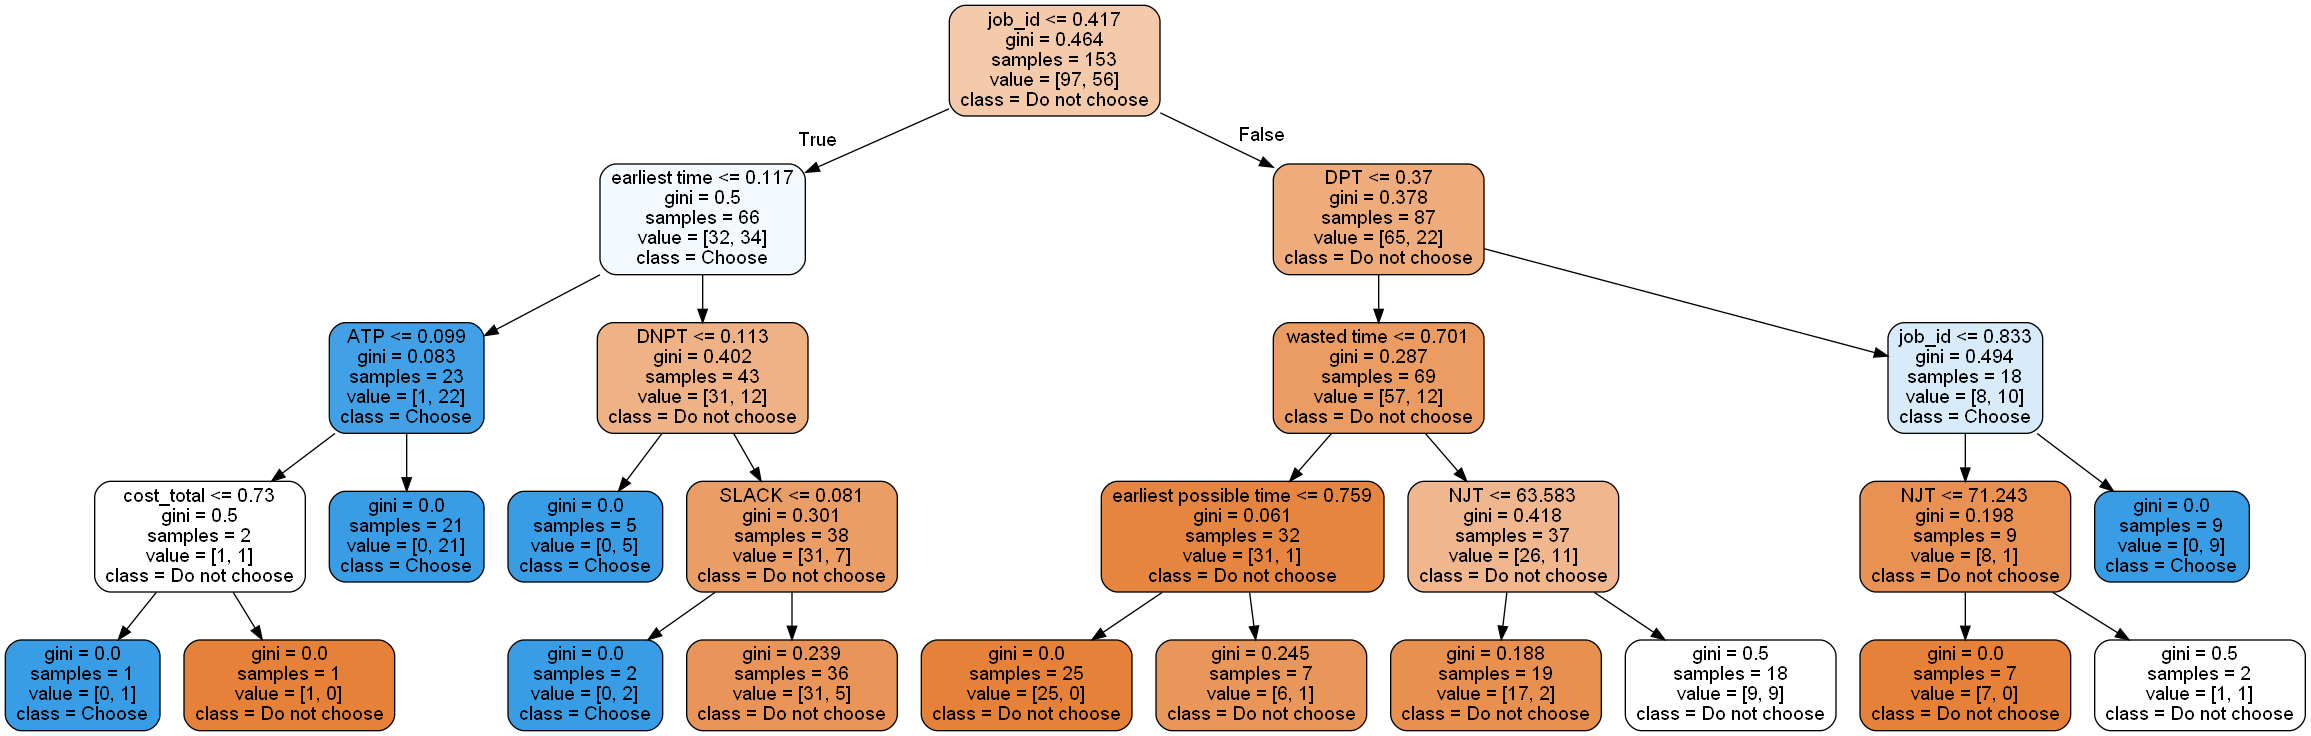

In [13]:
print('tree with gini')
columns = train_dataMA['feature_names']
bestVals = (0,0)
for i in randStates:
    tempVals = doTree(train_dataMA, test_dataMA, randomS = i)
    if tempVals[0] > bestVals[0]:
        bestVals = tempVals
visualize_tree(bestVals[1], columns)
tree1 = bestVals[1]

In [15]:
btree1 = lambda x: tree1.predict([x])
tests.addSolver(postactivity_solver_onlyMach(id, btree1),0,"modified good of 29, post movement"+str(i))

doing jssp 0
doing jssp 1
doing jssp 2
doing jssp 3
doing jssp 4
doing jssp 5
doing jssp 6
doing jssp 7
doing jssp 8
doing jssp 9
doing jssp 10
doing jssp 11
doing jssp 12
doing jssp 13
doing jssp 14
doing jssp 15
doing jssp 16
doing jssp 17
doing jssp 18


In [17]:
datagroup = by_good_player["63"]
dataActs = {}
dataMachines = {}
datapreMachines = {}
dataStates = {}
data_modified_pre = {}
data_modified_post = {}
idd = 0
for i in datagroup:
    currJss = JSSProblem(idd, i[0], file_solver(idd, i[1], i[0]["act_info"]) , dataActs,dataMachines,dataStates, datapreMachines)
    modified_steps = orderedSteps(currJss.machines)   
    JSSProblem(idd, i[0], m_solver(idd, modified_steps) , data_acts= data_modified_pre, data_state = data_modified_post)
     
    idd+=1
    
division = .60
if division>0:
    dAP = math.floor(len(dataActs['target'])*division)
    dM = math.floor(len(dataMachines['target'])*division)
    dSP = math.floor(len(dataStates['target'])*division)
    dPMP = math.floor(len(datapreMachines['target'])*division)
    dMP = math.floor(len(data_modified_pre['target'])*division)
    dMA = math.floor(len(data_modified_post['target'])*division)
    #pre
    train_dataA = {'data': dataActs['data'][:dAP], 'target': dataActs['target'][:dAP], 'feature_names': dataActs['feature_names']}
    test_dataA = {'data': dataActs['data'][dAP:], 'target': dataActs['target'][dAP:], 'feature_names': dataActs['feature_names']}

    train_dataM = {'data': dataMachines['data'][:dM], 'target': dataMachines['target'][:dM], 'feature_names': dataMachines['feature_names']}
    test_dataM = {'data': dataMachines['data'][dM:], 'target': dataMachines['target'][dM:], 'feature_names': dataMachines['feature_names']}

    dataStates['feature_names'] = dataStates['feature_names'][:8] + dataStates['feature_names'][9:]
    for i in range(len(dataStates['data'])):
        dataStates['data'][i] = dataStates['data'][i][:8] + dataStates['data'][i][9:]

    train_dataS = {'data': dataStates['data'][:dSP], 'target': dataStates['target'][:dSP], 'feature_names': dataStates['feature_names']}
    test_dataS = {'data': dataStates['data'][dSP:], 'target': dataStates['target'][dSP:], 'feature_names': dataStates['feature_names']}

    train_dataPM = {'data': datapreMachines['data'][:dPMP], 'target': datapreMachines['target'][:dPMP], 'feature_names': datapreMachines['feature_names']}
    test_dataPM = {'data': datapreMachines['data'][dPMP:], 'target': datapreMachines['target'][dPMP:], 'feature_names': datapreMachines['feature_names']}

    train_dataMP = {'data': data_modified_pre['data'][:dMP], 'target': data_modified_pre['target'][:dMP], 'feature_names': data_modified_pre['feature_names']}
    test_dataMP = {'data': data_modified_pre['data'][dMP:], 'target': data_modified_pre['target'][dMP:], 'feature_names': data_modified_pre['feature_names']}

    data_modified_post['feature_names'] = data_modified_post['feature_names'][:8] + data_modified_post['feature_names'][9:]
    for i in range(len(data_modified_post['data'])):
        data_modified_post['data'][i] = data_modified_post['data'][i][:8] + data_modified_post['data'][i][9:]
    train_dataMA = {'data': data_modified_post['data'][:dMA], 'target': data_modified_post['target'][:dMA], 'feature_names': data_modified_post['feature_names']}
    test_dataMA = {'data': data_modified_post['data'][dMA:], 'target': data_modified_post['target'][dMA:], 'feature_names': data_modified_post['feature_names']}


#no mayor changes were found using various random states
randStates = [0, 1234, 54321]


tree with gini
Using a Decision Tree
0.7289377289377289
Using a Decision Tree
0.7289377289377289
Using a Decision Tree
0.7289377289377289


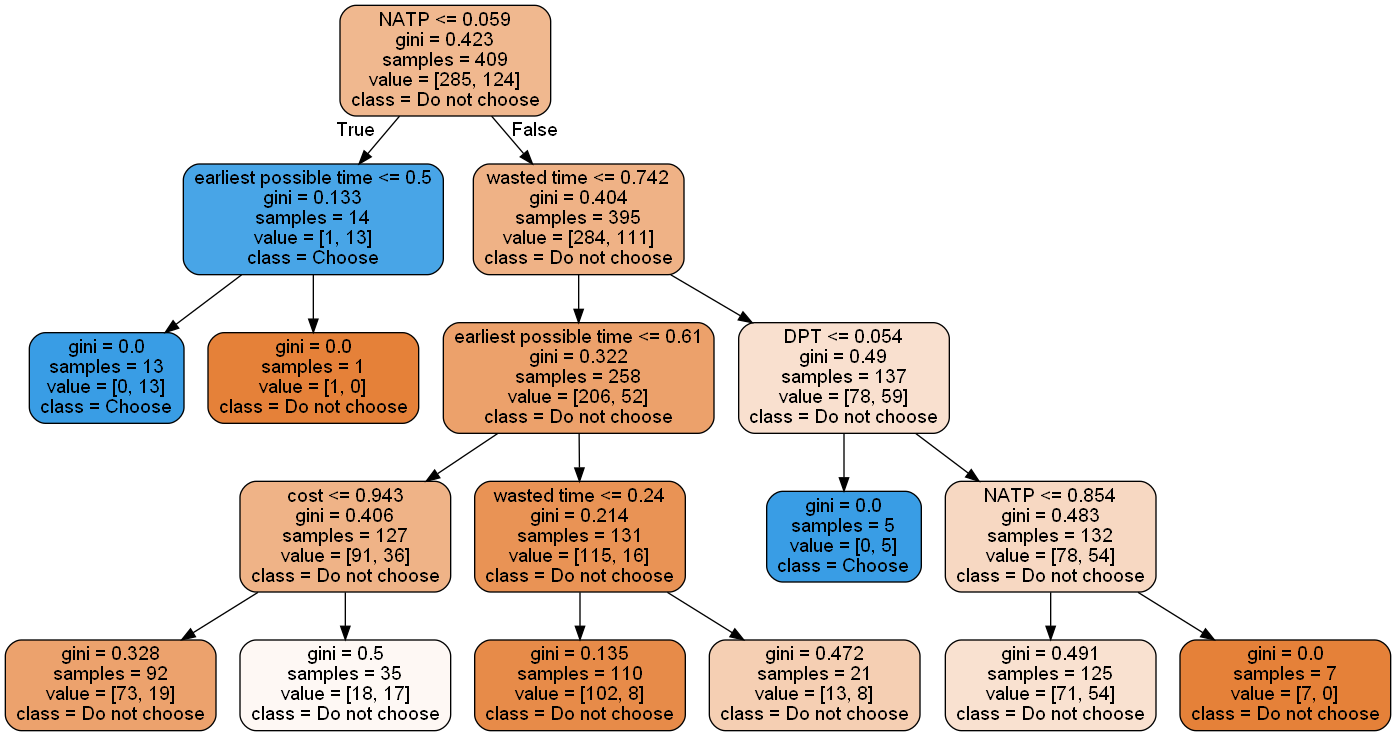

In [18]:
print('tree with gini')
columns = train_dataMA['feature_names']
bestVals = (0,0)
for i in randStates:
    tempVals = doTree(train_dataMA, test_dataMA, randomS = i)
    if tempVals[0] > bestVals[0]:
        bestVals = tempVals
visualize_tree(bestVals[1], columns)
tree1 = bestVals[1]

In [19]:
btree1 = lambda x: tree1.predict([x])
tests.addSolver(postactivity_solver_onlyMach(id, btree1),0,"modified good of 29, post movement"+str(i))

doing jssp 0
doing jssp 1
doing jssp 2
doing jssp 3
doing jssp 4
doing jssp 5
doing jssp 6
doing jssp 7
doing jssp 8
doing jssp 9
doing jssp 10
doing jssp 11
doing jssp 12
doing jssp 13
doing jssp 14
doing jssp 15
doing jssp 16
doing jssp 17
doing jssp 18


In [20]:
tests.dump()

{'id': 0, 'name': 'modified good of 29, post movement54321', 'accuracy': 0, 'evaluation': [388, 304, 386, 492, 568, 416, 538, 840, 1090, 826, 7076, 7345, 7550, 9681, 10177, 10468, 2737, 3686, 2770]}
{'id': 1, 'name': 'modified good of 29, post movement54321', 'accuracy': 0, 'evaluation': [476, 304, 487, 527, 740, 523, 606, 1181, 833, 1180, 8114, 8333, 9121, 11767, 10973, 12108, 3831, 4286, 3703]}


In [21]:
datagroup = complete_games
dataActs = {}
dataMachines = {}
datapreMachines = {}
dataStates = {}
data_modified_pre = {}
data_modified_post = {}
idd = 0
for i in datagroup:
    currJss = JSSProblem(idd, i[0], file_solver(idd, i[1], i[0]["act_info"]) , dataActs,dataMachines,dataStates, datapreMachines)
    modified_steps = orderedSteps(currJss.machines)   
    JSSProblem(idd, i[0], m_solver(idd, modified_steps) , data_acts= data_modified_pre, data_state = data_modified_post)
     
    idd+=1
    
division = .60
if division>0:
    dAP = math.floor(len(dataActs['target'])*division)
    dM = math.floor(len(dataMachines['target'])*division)
    dSP = math.floor(len(dataStates['target'])*division)
    dPMP = math.floor(len(datapreMachines['target'])*division)
    dMP = math.floor(len(data_modified_pre['target'])*division)
    dMA = math.floor(len(data_modified_post['target'])*division)
    #pre
    train_dataA = {'data': dataActs['data'][:dAP], 'target': dataActs['target'][:dAP], 'feature_names': dataActs['feature_names']}
    test_dataA = {'data': dataActs['data'][dAP:], 'target': dataActs['target'][dAP:], 'feature_names': dataActs['feature_names']}

    train_dataM = {'data': dataMachines['data'][:dM], 'target': dataMachines['target'][:dM], 'feature_names': dataMachines['feature_names']}
    test_dataM = {'data': dataMachines['data'][dM:], 'target': dataMachines['target'][dM:], 'feature_names': dataMachines['feature_names']}

    dataStates['feature_names'] = dataStates['feature_names'][:8] + dataStates['feature_names'][9:]
    for i in range(len(dataStates['data'])):
        dataStates['data'][i] = dataStates['data'][i][:8] + dataStates['data'][i][9:]

    train_dataS = {'data': dataStates['data'][:dSP], 'target': dataStates['target'][:dSP], 'feature_names': dataStates['feature_names']}
    test_dataS = {'data': dataStates['data'][dSP:], 'target': dataStates['target'][dSP:], 'feature_names': dataStates['feature_names']}

    train_dataPM = {'data': datapreMachines['data'][:dPMP], 'target': datapreMachines['target'][:dPMP], 'feature_names': datapreMachines['feature_names']}
    test_dataPM = {'data': datapreMachines['data'][dPMP:], 'target': datapreMachines['target'][dPMP:], 'feature_names': datapreMachines['feature_names']}

    train_dataMP = {'data': data_modified_pre['data'][:dMP], 'target': data_modified_pre['target'][:dMP], 'feature_names': data_modified_pre['feature_names']}
    test_dataMP = {'data': data_modified_pre['data'][dMP:], 'target': data_modified_pre['target'][dMP:], 'feature_names': data_modified_pre['feature_names']}

    data_modified_post['feature_names'] = data_modified_post['feature_names'][:8] + data_modified_post['feature_names'][9:]
    for i in range(len(data_modified_post['data'])):
        data_modified_post['data'][i] = data_modified_post['data'][i][:8] + data_modified_post['data'][i][9:]
    train_dataMA = {'data': data_modified_post['data'][:dMA], 'target': data_modified_post['target'][:dMA], 'feature_names': data_modified_post['feature_names']}
    test_dataMA = {'data': data_modified_post['data'][dMA:], 'target': data_modified_post['target'][dMA:], 'feature_names': data_modified_post['feature_names']}


#no mayor changes were found using various random states
randStates = [0, 1234, 54321]


tree with gini
Using a Decision Tree
0.6909497206703911
Using a Decision Tree
0.6927374301675978
Using a Decision Tree
0.6927374301675978


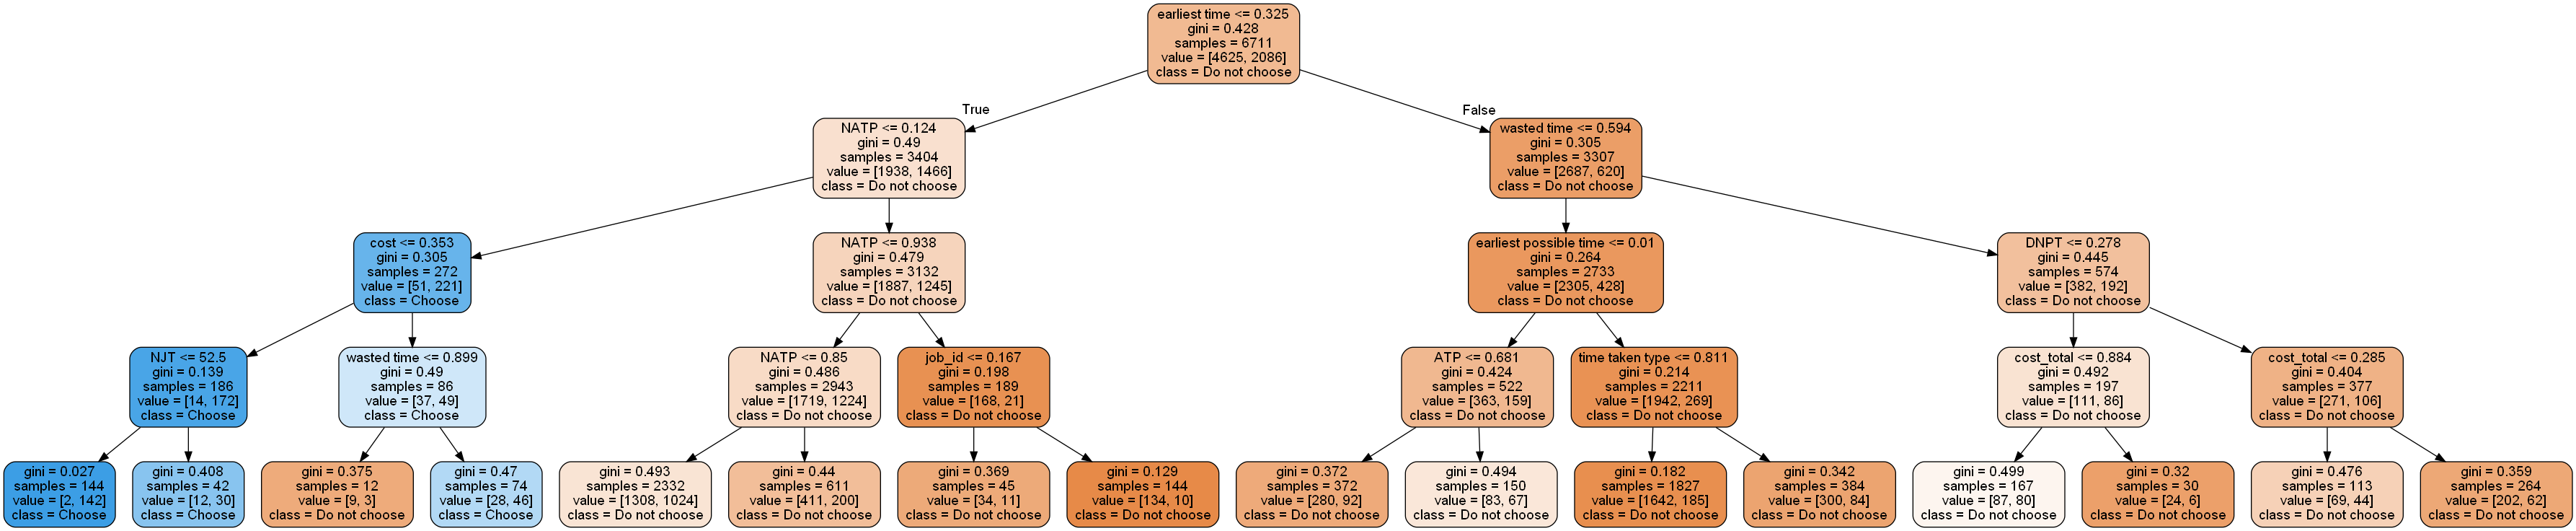

In [22]:
print('tree with gini')
columns = train_dataMA['feature_names']
bestVals = (0,0)
for i in randStates:
    tempVals = doTree(train_dataMA, test_dataMA, randomS = i)
    if tempVals[0] > bestVals[0]:
        bestVals = tempVals
visualize_tree(bestVals[1], columns)
tree1 = bestVals[1]

In [ ]:
def compareHeuristics(mainH, secondH)